In [443]:
library(ggplot2)

In [453]:
data <- read.csv("Gorse1.csv")

#### We wanted to show all of the places where the temps got below freezing. Each number was a minute where the temperature was below freezing. This data has shown that the controls are not below freezing, yet the middle of the rows are. We took out the column with the date and time as that is not needed.

In [455]:
data['Date-Time (HST)'] <- NULL

#### We counted the number of sub-zero readings for each sensor. 
#### This made it so each reading below freezing was categorized as true.
#### The number of TRUE were then summed

In [456]:
below_zero_counts <- colSums(data < 0, na.rm = TRUE)

#### This line makes a new table where sensors are on one side 
#### And number of times TRUE was counted on the other

In [458]:
below_zero_df <- data.frame(Sensor = names(below_zero_counts), Count = below_zero_counts)

#### Plotting with count labels
#### ggplot took the data frame with sensor on the x and count on the y
#### Then made a geom bar graph using the data
#### Then the size of the labels and bars were adjusted for better visuals
#### The bars were made black
#### The axis and table were labeled

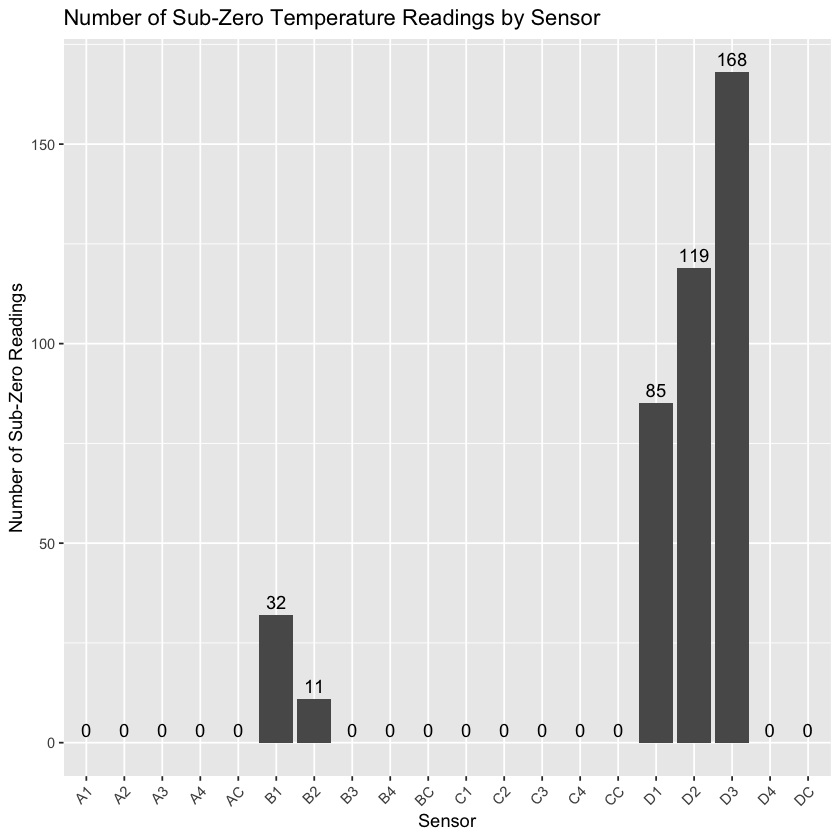

In [459]:
p <- ggplot(below_zero_df, aes(x = Sensor, y = Count)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black") + # Adding count labels
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Number of Sub-Zero Temperature Readings by Sensor",
       x = "Sensor",
       y = "Number of Sub-Zero Readings")

# Printed the data so I can see it
print(p)

In [449]:
library(dplyr)

In [209]:
head(gorse_data_all <- read.csv("Final Gorse Temps 2023.xlsx - Sheet1.csv"))

,Date.Time..HST.,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01/11/2023 10:24:37,21.49,24.06,22.99,24.36,18.02,19.82,25.82,24.24,23.76,⋯,21.83,25.69,25.69,25.82,18.27,18.96,25.69,25.52,25.44,17.89
2,01/11/2023 10:25:37,21.79,24.06,22.95,24.28,18.19,19.99,25.82,24.24,23.85,⋯,21.49,25.57,25.65,25.52,18.32,18.74,25.69,25.44,25.35,18.06
3,01/11/2023 10:26:37,21.79,23.81,22.95,24.45,18.32,20.16,25.82,24.11,24.02,⋯,21.19,25.35,25.39,25.35,18.27,18.70,25.57,25.31,25.39,18.32
4,01/11/2023 10:27:37,21.96,23.72,23.34,24.54,18.49,20.50,25.61,24.11,24.19,⋯,21.45,25.14,25.09,25.27,18.57,18.62,25.57,25.69,25.31,18.40
5,01/11/2023 10:28:37,21.96,23.42,23.85,24.84,18.79,20.46,25.78,24.45,24.58,⋯,21.79,25.05,25.01,25.05,18.96,18.87,25.27,25.99,25.27,18.32
6,01/11/2023 10:29:37,21.66,23.29,24.02,25.01,19.17,20.59,25.82,24.84,24.75,⋯,22.01,25.01,24.49,25.48,19.00,18.87,25.69,26.34,24.88,18.53


#### We wanted to find out where inside the gorse rows were coldest/warmest by finding the average temperatures. I will group all of the sensors by position- 1, 2, 3, 4, C and see if there are any positional differences in temperature.

#### The original dataframe had very long, inconsistent column names, so they were renamed to more concise names.

In [210]:
gorse_data_all <- gorse_data_all %>% 
  rename(A1 = A1.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
  rename(A2 = A2.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
  rename(A3 = A3.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
  rename(A4 = A4.Temperature...C..)

gorse_data_all <- gorse_data_all %>% 
  rename(AC = AC.Temperature.....C..)
  
gorse_data_all <- gorse_data_all %>% 
  rename(B1 = B1.Temperature.....C.)

gorse_data_all <- gorse_data_all %>% 
  rename(B2 = B2.Temperature.....C..)
  
gorse_data_all <- gorse_data_all %>% 
  rename(B3 = B3.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
    rename(B4 = B4.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
    rename(BC= BC.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
    rename(CC = CC.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
  rename(C1 = C1.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
  rename(C2 = C2.Temperature.....C..)
  
gorse_data_all <- gorse_data_all %>% 
  rename(C3 = C3.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
  rename(C4 = C4.Temperature.....C..)
  
gorse_data_all <- gorse_data_all %>% 
  rename(DC = DC.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
  rename(D1 = D1.Temperature.....C..)
  
gorse_data_all <- gorse_data_all %>% 
  rename(D2 = D2.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
  rename(D3 = D3.Temperature.....C..)

gorse_data_all <- gorse_data_all %>% 
  rename(D4 = D4.Temperature.....C..)

#### The dataframe originally contained a datetime column that was difficult to work with. So that column was reformatted and the dates and times were individually extracted from that column to form two new columns.

In [211]:
library(lubridate)

In [212]:
## 
## Attaching package: 'lubridate'

In [213]:
## The following objects are masked from 'package:base':
## 
##     date, intersect, setdiff, union

In [214]:
#format time date column
gorse_data_all$Date.Time..HST. <- as.POSIXct(strptime(gorse_data_all$Date.Time..HST., format = "%m/%d/%Y %H:%M:%S"))

#separate time from date
gorse_data_all$time <- format(gorse_data_all$Date.Time..HST., format = "%H:%M:%S")

#separate date from time
gorse_data_all$date <- as.Date(gorse_data_all$Date.Time..HST., "%m/%d/%Y")

In [215]:
## Warning in as.POSIXlt.POSIXct(x, tz = tz): unknown timezone '%m/%d/%Y'

In [216]:
## Warning in as.POSIXlt.POSIXct(x, tz = tz): unknown timezone '%m/%d/%Y'

#view changes
head(gorse_data_all)

,Date.Time..HST.,AC,A1,A2,A3,A4,BC,B1,B2,B3,⋯,C2,C3,C4,DC,D1,D2,D3,D4,time,date
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
1,2023-01-11 10:24:37,21.49,24.06,22.99,24.36,18.02,19.82,25.82,24.24,23.76,⋯,25.69,25.82,18.27,18.96,25.69,25.52,25.44,17.89,10:24:37,2023-01-11
2,2023-01-11 10:25:37,21.79,24.06,22.95,24.28,18.19,19.99,25.82,24.24,23.85,⋯,25.65,25.52,18.32,18.74,25.69,25.44,25.35,18.06,10:25:37,2023-01-11
3,2023-01-11 10:26:37,21.79,23.81,22.95,24.45,18.32,20.16,25.82,24.11,24.02,⋯,25.39,25.35,18.27,18.70,25.57,25.31,25.39,18.32,10:26:37,2023-01-11
4,2023-01-11 10:27:37,21.96,23.72,23.34,24.54,18.49,20.50,25.61,24.11,24.19,⋯,25.09,25.27,18.57,18.62,25.57,25.69,25.31,18.40,10:27:37,2023-01-11
5,2023-01-11 10:28:37,21.96,23.42,23.85,24.84,18.79,20.46,25.78,24.45,24.58,⋯,25.01,25.05,18.96,18.87,25.27,25.99,25.27,18.32,10:28:37,2023-01-11
6,2023-01-11 10:29:37,21.66,23.29,24.02,25.01,19.17,20.59,25.82,24.84,24.75,⋯,24.49,25.48,19.00,18.87,25.69,26.34,24.88,18.53,10:29:37,2023-01-11


In [217]:


##       Date.Time..HST.    AC    A1    A2    A3    A4    BC    B1    B2    B3
## 1 2023-01-11 10:24:37 21.49 24.06 22.99 24.36 18.02 19.82 25.82 24.24 23.76
## 2 2023-01-11 10:25:37 21.79 24.06 22.95 24.28 18.19 19.99 25.82 24.24 23.85
## 3 2023-01-11 10:26:37 21.79 23.81 22.95 24.45 18.32 20.16 25.82 24.11 24.02
## 4 2023-01-11 10:27:37 21.96 23.72 23.34 24.54 18.49 20.50 25.61 24.11 24.19
## 5 2023-01-11 10:28:37 21.96 23.42 23.85 24.84 18.79 20.46 25.78 24.45 24.58
## 6 2023-01-11 10:29:37 21.66 23.29 24.02 25.01 19.17 20.59 25.82 24.84 24.75
##      B4    CC    C1    C2    C3    C4    DC    D1    D2    D3    D4     time
## 1 23.85 21.83 25.69 25.69 25.82 18.27 18.96 25.69 25.52 25.44 17.89 10:24:37
## 2 23.98 21.49 25.57 25.65 25.52 18.32 18.74 25.69 25.44 25.35 18.06 10:25:37
## 3 24.11 21.19 25.35 25.39 25.35 18.27 18.70 25.57 25.31 25.39 18.32 10:26:37
## 4 24.41 21.45 25.14 25.09 25.27 18.57 18.62 25.57 25.69 25.31 18.40 10:27:37
## 5 24.92 21.79 25.05 25.01 25.05 18.96 18.87 25.27 25.99 25.27 18.32 10:28:37
## 6 25.09 22.01 25.01 24.49 25.48 19.00 18.87 25.69 26.34 24.88 18.53 10:29:37
##         date
## 1 2023-01-11
## 2 2023-01-11
## 3 2023-01-11
## 4 2023-01-11
## 5 2023-01-11
## 6 2023-01-11

#### The means of each sensor position were individually calculated, as well as the highest and lowest recorded temperatures.
#### The warmest recorded temperature was on March 30th, while the coldest recorded temperature was on January 11th.

In [219]:
#Calculate mean, highest, and lowest temperature values of each Position

mean_A1 <- mean(gorse_data_all$A1, na.rm = TRUE)
lowestval_A1 <- min(gorse_data_all$A1, na.rm = TRUE)
highestval_A1 <- max(gorse_data_all$A1, na.rm = TRUE)

mean_B1 <- mean(gorse_data_all$B1, na.rm = TRUE)

# Calculate the highest temperature value for each column
highest_temps_24hr <- apply(gorse_data_all, 2, max)

# Calculate the lowest temperature value for each column
lowest_temps_24hr <- apply(gorse_data_all, 2, min)

# Print the results
cat("Highest values:\n", highest_temps_24hr, "\n\n")

Highest values:
 2023-03-30 04:05:26 31.27 34.83 35.26 36.98 34.45 30.76 37.32 37.02 37.96 29.98 32.22 32.22 34.66 36.08 27.67 28.87 33.50 32.94 32.99 31.61 23:59:37 2023-03-30 



In [220]:
## Highest values:
##  2023-03-30 04:05:26 31.27 34.83 35.26 36.98 34.45 30.76 37.32 37.02 37.96 29.98 32.22 32.22 34.66 36.08 27.67 28.87 33.50 32.94 32.99 31.61 23:59:37 2023-03-30

In [221]:
cat("Lowest values:\n", lowest_temps_24hr, "\n")

Lowest values:
 2023-01-11 10:24:37  2.36  0.04  0.25  0.34  0.08  2.31  0.00  0.00  0.00  1.24  2.36  0.60  0.73  0.64  1.20  2.01  0.00  0.00  0.00  0.90 00:00:26 2023-01-11 


In [222]:
## Lowest values:
##  2023-01-11 10:24:37  2.36  0.04  0.25  0.34  0.08  2.31 -0.05 -0.05  0.00  1.24  2.36  0.60  0.73  0.64  1.20  2.01 -0.05 -0.05 -0.05  0.90 00:00:26 2023-01-11

#### The collective means of the four replicate sensors for each position were calculated.

In [224]:
#Position 1

Position1_columns <- c('A1', 'B1', 'C1', 'D1')
means_of_position1 <- colMeans(gorse_data_all[Position1_columns], na.rm = TRUE)
print(means_of_position1)

      A1       B1       C1       D1 
11.51034 12.08074 11.76880 11.81826 


In [225]:


##       A1       B1       C1       D1 
## 11.51034 12.08074 11.76880 11.81826

In [226]:
P1 <- mean(means_of_position1)

#Position 2

Position2_columns <- c('A2', 'B2', 'C2', 'D2')
means_of_position2 <- colMeans(gorse_data_all[Position2_columns], na.rm = TRUE)
print(means_of_position2)

      A2       B2       C2       D2 
12.02348 12.29625 11.97498 11.49950 


In [227]:
##       A2       B2       C2       D2 
## 12.02348 12.29625 11.97498 11.49950

In [228]:
P2 <- mean(means_of_position2)

#Position 3

Position3_columns <- c('A3', 'B3', 'C3', 'D3')
means_of_position3 <- colMeans(gorse_data_all[Position3_columns], na.rm = TRUE)
print(means_of_position3)

      A3       B3       C3       D3 
11.89321 12.20482 12.05987 11.47203 


In [229]:
##       A3       B3       C3       D3 
## 11.89321 12.20482 12.05987 11.47203

In [230]:

P3 <- mean(means_of_position3)

#Position 4

Position4_columns <- c('A4', 'B4', 'C4', 'D4')
means_of_position4 <- colMeans(gorse_data_all[Position4_columns], na.rm = TRUE)
print(means_of_position4)

      A4       B4       C4       D4 
11.33024 11.29507 10.62006 10.88907 


In [231]:
##       A4       B4       C4       D4 
## 11.33024 11.29507 10.62006 10.88907

In [232]:
P4 <- mean(means_of_position4)

#Position C

control_columns <- c('AC', 'BC', 'CC', 'DC')
means_of_controls <- colMeans(gorse_data_all[control_columns], na.rm = TRUE)
print(means_of_controls)

      AC       BC       CC       DC 
11.84273 11.87375 11.93556 11.53547 


In [233]:
##       AC       BC       CC       DC 
## 11.84273 11.87375 11.93556 11.53547

In [234]:
PC <- mean(means_of_controls)

#### A table containing the daily temperature means was created.

In [235]:
print(means_table <- data.frame(
  Position = c("P1", "P2", "P3", "P4", "PC"),
  Avg_Daily_Temp_Celsius = c(11.79454, 11.94855, 11.90748, 11.03361, 11.79687)
  ))

  Position Avg_Daily_Temp_Celsius
1       P1               11.79454
2       P2               11.94855
3       P3               11.90748
4       P4               11.03361
5       PC               11.79687


In [236]:
##   Position Avg_Daily_Temp_Celsius
## 1       P1               11.79454
## 2       P2               11.94855
## 3       P3               11.90748
## 4       P4               11.03361
## 5       PC               11.79687

#### Results to include all times of all days:

#### Position 1: middle of Koa row: highest average temps: 11.79 
#### Position 2: outside edge of gorse: second highest average temp: 11.95 
#### Position 3: edge of gorse: second lowest average temp: 11.91 
#### Position 4: within gorse: lowest average temp: 11.03 
#### Control Position: outside of gorse row

#### The dataset was filtered to exclusively include temperature readings from the hours of 12am-5am. We wanted to see if the nighttime temperatures had any positional trends. We hypothesized that the position 4 sensors would have the warmest average nighttime temperatures, assuming that the gorse shrubbery would insulate them from the cold.  The positional replicates were combined into a single column named by the position. Position 1 includes A1, B1, C1, and D1.

In [237]:
# Filter data to hours of 0000-0500.

gorse_data_night <- gorse_data_all %>%
  filter(as.POSIXct(time, format = "%H:%M:%S") >= as.POSIXct("00:00:00", format = "%H:%M:%S") &
         as.POSIXct(time, format = "%H:%M:%S") < as.POSIXct("05:00:00", format = "%H:%M:%S"))

head(gorse_data_night <- subset(gorse_data_night, select = -Date.Time..HST.))

,AC,A1,A2,A3,A4,BC,B1,B2,B3,B4,⋯,C2,C3,C4,DC,D1,D2,D3,D4,time,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
1,6.17,2.79,3.17,3.17,2.70,5.62,3.64,3.99,3.77,5.10,⋯,4.84,4.67,5.70,5.19,4.33,4.59,4.50,5.66,00:00:37,2023-01-12
2,6.22,2.79,3.17,3.17,2.70,5.49,3.56,3.90,3.77,5.06,⋯,4.84,4.72,5.70,5.23,4.37,4.72,4.50,5.66,00:01:37,2023-01-12
3,6.26,2.79,3.17,3.17,2.79,5.23,3.52,3.86,3.69,5.02,⋯,4.89,4.80,5.70,5.23,4.42,4.72,4.59,5.70,00:02:37,2023-01-12
4,6.22,2.79,3.13,3.17,2.83,4.97,3.47,3.82,3.64,4.97,⋯,5.02,4.89,5.79,5.32,4.42,4.72,4.59,5.70,00:03:37,2023-01-12
5,6.17,2.83,3.13,3.17,2.79,4.84,3.39,3.73,3.60,4.93,⋯,5.06,4.89,5.75,5.32,4.46,4.76,4.63,5.70,00:04:37,2023-01-12
6,6.22,2.83,3.13,3.13,2.87,4.80,3.34,3.73,3.56,4.89,⋯,5.06,4.89,5.75,5.23,4.46,4.80,4.63,5.66,00:05:37,2023-01-12


In [238]:
##     AC   A1   A2   A3   A4   BC   B1   B2   B3   B4   CC   C1   C2   C3   C4
## 1 6.17 2.79 3.17 3.17 2.70 5.62 3.64 3.99 3.77 5.10 5.79 4.72 4.84 4.67 5.70
## 2 6.22 2.79 3.17 3.17 2.70 5.49 3.56 3.90 3.77 5.06 5.83 4.76 4.84 4.72 5.70
## 3 6.26 2.79 3.17 3.17 2.79 5.23 3.52 3.86 3.69 5.02 5.79 4.76 4.89 4.80 5.70
## 4 6.22 2.79 3.13 3.17 2.83 4.97 3.47 3.82 3.64 4.97 5.83 4.80 5.02 4.89 5.79
## 5 6.17 2.83 3.13 3.17 2.79 4.84 3.39 3.73 3.60 4.93 5.83 4.89 5.06 4.89 5.75
## 6 6.22 2.83 3.13 3.13 2.87 4.80 3.34 3.73 3.56 4.89 5.87 4.89 5.06 4.89 5.75
##     DC   D1   D2   D3   D4     time       date
## 1 5.19 4.33 4.59 4.50 5.66 00:00:37 2023-01-12
## 2 5.23 4.37 4.72 4.50 5.66 00:01:37 2023-01-12
## 3 5.23 4.42 4.72 4.59 5.70 00:02:37 2023-01-12
## 4 5.32 4.42 4.72 4.59 5.70 00:03:37 2023-01-12
## 5 5.32 4.46 4.76 4.63 5.70 00:04:37 2023-01-12
## 6 5.23 4.46 4.80 4.63 5.66 00:05:37 2023-01-12

In [239]:
#combine As, Bs, Cs, Ds, and controls

library(tidyr)

gorse_data_night <- gather(gorse_data_night, key = "1REP", value = "P1", A1, B1, C1, D1)
gorse_data_night <- gather(gorse_data_night, key = "2REP", value = "P2", A2, B2, C2, D2)
gorse_data_night <- gather(gorse_data_night, key = "3REP", value = "P3", A3, B3, C3, D3)
gorse_data_night <- gather(gorse_data_night, key = "4REP", value = "P4", A4, B4, C4, D4)
gorse_data_night <- gather(gorse_data_night, key = "CREP", value = "PC", AC, BC, CC, DC)
gorse_data_night <- subset(gorse_data_night, select = -`1REP`)
gorse_data_night <- subset(gorse_data_night, select = -`2REP`)
gorse_data_night <- subset(gorse_data_night, select = -`3REP`)
gorse_data_night <- subset(gorse_data_night, select = -`4REP`)
gorse_data_night <- subset(gorse_data_night, select = -`CREP`)

head(gorse_data_night)

,time,date,P1,P2,P3,P4,PC
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,00:00:37,2023-01-12,2.79,3.17,3.17,2.70,6.17
2,00:01:37,2023-01-12,2.79,3.17,3.17,2.70,6.22
3,00:02:37,2023-01-12,2.79,3.17,3.17,2.79,6.26
4,00:03:37,2023-01-12,2.79,3.13,3.17,2.83,6.22
5,00:04:37,2023-01-12,2.83,3.13,3.17,2.79,6.17
6,00:05:37,2023-01-12,2.83,3.13,3.13,2.87,6.22


In [240]:
##       time       date   P1   P2   P3   P4   PC
## 1 00:00:37 2023-01-12 2.79 3.17 3.17 2.70 6.17
## 2 00:01:37 2023-01-12 2.79 3.17 3.17 2.70 6.22
## 3 00:02:37 2023-01-12 2.79 3.17 3.17 2.79 6.26
## 4 00:03:37 2023-01-12 2.79 3.13 3.17 2.83 6.22
## 5 00:04:37 2023-01-12 2.83 3.13 3.17 2.79 6.17
## 6 00:05:37 2023-01-12 2.83 3.13 3.13 2.87 6.22

#### The means of each new columns were then calculated to determine an overall night mean for each position. The averages were added to the table containing the daily temperature averages.

In [241]:
selected_columns <- c('P1', 'P2', "P3", "P4", "PC")

# Calculate the mean for the selected columns, then print.
print(night_means <- colMeans(gorse_data_night[selected_columns], na.rm = TRUE))

      P1       P2       P3       P4       PC 
6.458640 6.569659 6.557116 7.042890 7.438489 


In [242]:
##       P1       P2       P3       P4       PC 
## 6.458640 6.569659 6.557116 7.042890 7.438489

In [243]:
#Make a table of the means
night_means_table <- data.frame(
  Position = c("P1", "P2", "P3", "P4", "PC"),
  Avg_Nighttime_Temp_Celsius = c(6.458640, 6.569659, 6.557116, 7.042890, 7.438489)
  )

#Combine daily avg table and nightly average table
means_table <- means_table %>%
  mutate(Avg_Nighttime_Temp_Celsius = night_means_table$Avg_Nighttime_Temp_Celsius)

#### An ANOVA Test was performed to compare the values between groups- in this case- temperatures between positions. The results were then transformed into a table.

In [244]:
#make subset to compare
night_anova_subset <- gorse_data_night[, c('P1', 'P2', 'P3', 'P4', 'PC')]

#format data for ANOVA
long_night <- stack(night_anova_subset)

# Perform ANOVA
night_anova <- aov(values ~ ind, data = long_night)

print(summary(night_anova))

                   Df    Sum Sq Mean Sq F value Pr(>F)    
ind                 4  16599261 4149815  629715 <2e-16 ***
Residuals   119531515 787711190       7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [245]:
##                    Df    Sum Sq Mean Sq F value Pr(>F)    
## ind                 4  16599261 4149815  629715 <2e-16 ***
## Residuals   119531515 787711190       7                   
## ---
## Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [246]:
library(broom)
print(night_anova_table <- tidy(night_anova))

# A tibble: 2 × 6
  term             df      sumsq     meansq statistic p.value
  <chr>         <dbl>      <dbl>      <dbl>     <dbl>   <dbl>
1 ind               4  16599261. 4149815.     629715.       0
2 Residuals 119531515 787711190.       6.59       NA       NA


In [247]:
## # A tibble: 2 × 6
##   term             df      sumsq     meansq statistic p.value
##   <chr>         <dbl>      <dbl>      <dbl>     <dbl>   <dbl>
## 1 ind               4  16599261. 4149815.     629715.       0
## 2 Residuals 119531515 787711190.       6.59       NA       NA

#### The ANOVA table is used to assess the significance of the variation between group means compared to the variation within groups. We wanted to see if there was a significant difference between the nigtht time temperatures at each position. The p-value is very close to zero (<2e-16), which indicates that there is a significant difference between the temperatures.Tukey’s multiple comparisons to assess the differences between the mean temperatures of different positions (P1, P2, P3, P4).Using the broom package, I cleaned up the data and ran a Tukey test, converted it to a table, and printed it. THis showed that all of the individual positions had significantly different nighttime temperature averages from one another. P1 and PC were the most different, while P2 and P3 were the most similar.

In [248]:
print(posthoc_tukey <- TukeyHSD(night_anova))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = values ~ ind, data = long_night)

$ind
             diff         lwr         upr p adj
P2-P1  0.11101913  0.10899373  0.11304452     0
P3-P1  0.09847629  0.09645090  0.10050169     0
P4-P1  0.58424944  0.58222405  0.58627484     0
PC-P1  0.97984848  0.97782308  0.98187387     0
P3-P2 -0.01254283 -0.01456823 -0.01051744     0
P4-P2  0.47323032  0.47120492  0.47525571     0
PC-P2  0.86882935  0.86680396  0.87085474     0
P4-P3  0.48577315  0.48374776  0.48779855     0
PC-P3  0.88137218  0.87934679  0.88339758     0
PC-P4  0.39559903  0.39357364  0.39762443     0



In [249]:
##   Tukey multiple comparisons of means
##     95% family-wise confidence level
## 
## Fit: aov(formula = values ~ ind, data = long_night)
## 
## $ind
##              diff         lwr         upr p adj
## P2-P1  0.11101913  0.10899373  0.11304452     0
## P3-P1  0.09847629  0.09645090  0.10050169     0
## P4-P1  0.58424944  0.58222405  0.58627484     0
## PC-P1  0.97984848  0.97782308  0.98187387     0
## P3-P2 -0.01254283 -0.01456823 -0.01051744     0
## P4-P2  0.47323032  0.47120492  0.47525571     0
## PC-P2  0.86882935  0.86680396  0.87085475     0
## P4-P3  0.48577315  0.48374776  0.48779855     0
## PC-P3  0.88137218  0.87934679  0.88339758     0
## PC-P4  0.39559903  0.39357364  0.39762443     0

In [250]:
print(posthoc_tukey_table <- tidy(posthoc_tukey))

# A tibble: 10 × 7
   term  contrast null.value estimate conf.low conf.high adj.p.value
   <chr> <chr>         <dbl>    <dbl>    <dbl>     <dbl>       <dbl>
 1 ind   P2-P1             0   0.111    0.109     0.113            0
 2 ind   P3-P1             0   0.0985   0.0965    0.101            0
 3 ind   P4-P1             0   0.584    0.582     0.586            0
 4 ind   PC-P1             0   0.980    0.978     0.982            0
 5 ind   P3-P2             0  -0.0125  -0.0146   -0.0105           0
 6 ind   P4-P2             0   0.473    0.471     0.475            0
 7 ind   PC-P2             0   0.869    0.867     0.871            0
 8 ind   P4-P3             0   0.486    0.484     0.488            0
 9 ind   PC-P3             0   0.881    0.879     0.883            0
10 ind   PC-P4             0   0.396    0.394     0.398            0


In [251]:
## # A tibble: 10 × 7
##    term  contrast null.value estimate conf.low conf.high adj.p.value
##    <chr> <chr>         <dbl>    <dbl>    <dbl>     <dbl>       <dbl>
##  1 ind   P2-P1             0   0.111    0.109     0.113            0
##  2 ind   P3-P1             0   0.0985   0.0965    0.101            0
##  3 ind   P4-P1             0   0.584    0.582     0.586            0
##  4 ind   PC-P1             0   0.980    0.978     0.982            0
##  5 ind   P3-P2             0  -0.0125  -0.0146   -0.0105           0
##  6 ind   P4-P2             0   0.473    0.471     0.475            0
##  7 ind   PC-P2             0   0.869    0.867     0.871            0
##  8 ind   P4-P3             0   0.486    0.484     0.488            0
##  9 ind   PC-P3             0   0.881    0.879     0.883            0
## 10 ind   PC-P4             0   0.396    0.394     0.398            0

#### We performed an Analysis of Variance (ANOVA), followed by Tukey’s multiple comparisons to assess the differences between the mean temperatures of different positions (P1, P2, P3, P4).

#### P2 vs. P1: The difference is 0.1110 with a 95% confidence interval of [0.1071, 0.1149]. This difference is statistically significant (p-value = 0).

#### P3 vs. P1: The difference is 0.0985 with a 95% confidence interval of [0.0945, 0.1024]. This difference is statistically significant (p-value = 0).

#### P4 vs. P1: The difference is 0.5842 with a 95% confidence interval of [0.5803, 0.5882]. This difference is statistically significant (p-value = 0).

#### P3 vs. P2: The difference is -0.0125 with a 95% confidence interval of [-0.0165, -0.0086]. This difference is statistically significant (p-value = 0).

#### P4 vs. P2: The difference is 0.4732 with a 95% confidence interval of [0.4693, 0.4772]. This difference is statistically significant (p-value = 0).

#### P4 vs. P3: The difference is 0.4858 with a 95% confidence interval of [0.4818, 0.4897]. This difference is statistically significant (p-value = 0).

#### In this dataset, all p-values are very close to zero, indicating significant differences between the groups.

#### We decided to show the mean temp of each sensor between 12AM-5AM using a bar chart in ggplot2.

In [252]:
library(ggplot2)

In [253]:
# Average of each sensor at all 4 locations:
# Control: 7.43848860618521
# Sensor 1: 6.4586401310717
# Sensor 2: 6.56965925640367
# Sensor 3: 6.55711642251349
# Sensor 4: 7.04288957423113

In [254]:
library(lubridate)
library(dplyr)
Final_Data <- read.csv(file = "Copy of Final Gorse Temps 2023(copy).csv", header = TRUE)

#### We made a dataframe to pair each sensor with its mean value.

In [255]:
temperature_data <- data.frame(
  Location = c("Control", "Sensor 1", "Sensor 2", "Sensor 3", "Sensor 4"),
  Average_Temperature = c(7.43848860618521, 6.4586401310717, 6.56965925640367, 6.55711642251349, 7.04288957423113)
)

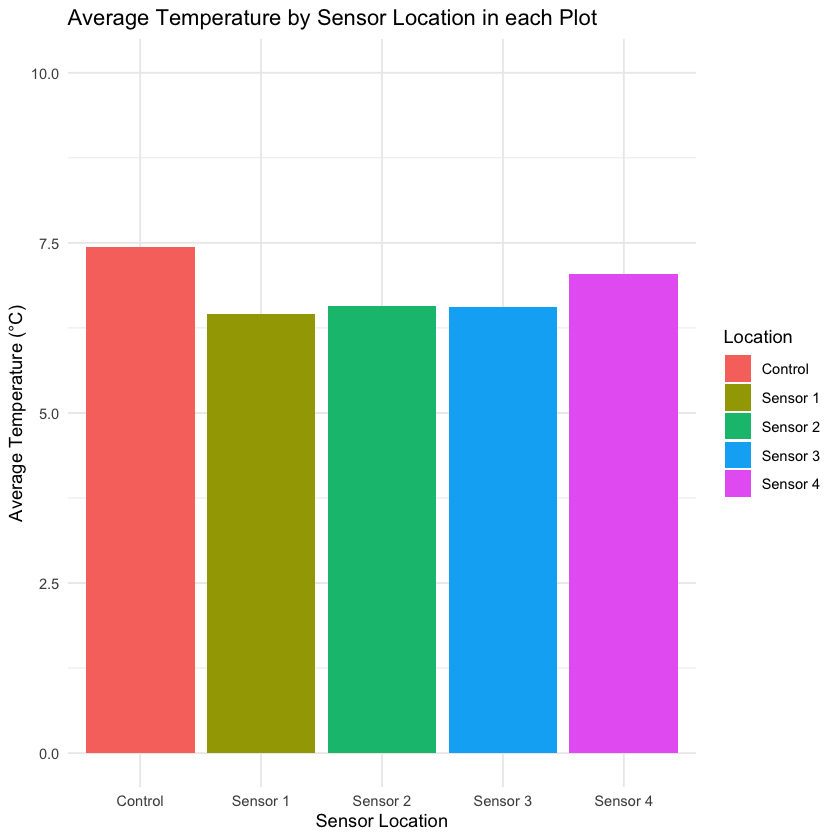

In [256]:
ggplot(temperature_data, aes(x = Location, y = Average_Temperature, fill = Location)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Temperature by Sensor Location in each Plot",
       x = "Sensor Location",
       y = "Average Temperature (°C)") +
  theme_minimal() +
  coord_cartesian(ylim = c(0, 10))

#### We wanted to create error bars so we found the standard error and then inserted the standard error value into code to make a new barchart. 
#### We also changed some asthetics to make the chart easier to read.
#### PLEASE IGNORE CELLS 85-103, we combined the work of two people so some code had to be repeated. 

In [257]:
Final_Data <- Final_Data %>%
  mutate(Date_Time_HST = mdy_hms(Date_Time_HST))

In [258]:
Final_Data$Date_Time_HST <- as.POSIXct(Final_Data$Date_Time_HST, format = "%m/%d/%Y %H:%M:%S")

In [259]:
class(Final_Data$Date_Time_HST)

[1] "POSIXct" "POSIXt"

In [260]:
filtered_data <- Final_Data %>%
  filter(hour(Date_Time_HST) >= 0 & hour(Date_Time_HST) < 5,
         Date_Time_HST >= as.POSIXct("01/11/2023 00:00:00", format = "%m/%d/%Y %H:%M:%S") &
         Date_Time_HST <= as.POSIXct("03/30/2023 05:00:00", format = "%m/%d/%Y %H:%M:%S"))

In [261]:
selected_data_C <- filtered_data %>%
  select("CC.Temperature.....C..", "C1.Temperature.....C..", "C2.Temperature.....C..", "C3.Temperature.....C..", "C4.Temperature.....C..")

In [262]:
head(selected_data_C, n=3)

,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.79,4.72,4.84,4.67,5.7
2,5.83,4.76,4.84,4.72,5.7
3,5.79,4.76,4.89,4.80,5.7


In [263]:
selected_data_1 <- filtered_data %>%
  select("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")

In [264]:
head(selected_data_1, n=3)

,A1.Temperature.....C..,B1.Temperature.....C.,C1.Temperature.....C..,D1.Temperature.....C..
,<dbl>,<dbl>,<dbl>,<dbl>
1,2.79,3.64,4.72,4.33
2,2.79,3.56,4.76,4.37
3,2.79,3.52,4.76,4.42


In [265]:
selected_data_2 <- filtered_data %>%
  select("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")

In [266]:
head(selected_data_2, n=3)

,A2.Temperature.....C..,B2.Temperature.....C..,C2.Temperature.....C..,D2.Temperature.....C..
,<dbl>,<dbl>,<dbl>,<dbl>
1,3.17,3.99,4.84,4.59
2,3.17,3.90,4.84,4.72
3,3.17,3.86,4.89,4.72


In [267]:
selected_data_3 <- filtered_data %>%
  select("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")

In [268]:
selected_data_4 <- filtered_data %>%
  select("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")

In [269]:
# Combine data vectors (excluding the first row)
All_Data_SD <- c(selected_data_C[-1], selected_data_1[-1], selected_data_2[-1], selected_data_3[-1], selected_data_4[-1])

# Flatten the list or data frame to numeric vector
All_Data_SD_numeric <- as.numeric(unlist(All_Data_SD))

# Calculate standard deviation
sd_value <- sd(All_Data_SD_numeric, na.rm = TRUE)

# Calculate standard error
se_value <- sd_value / sqrt(length(All_Data_SD_numeric))

# Print the result
cat("Standard Error:", se_value, "\n")


Standard Error: 0.004252244 


In [270]:
sd_value

[1] 2.598869

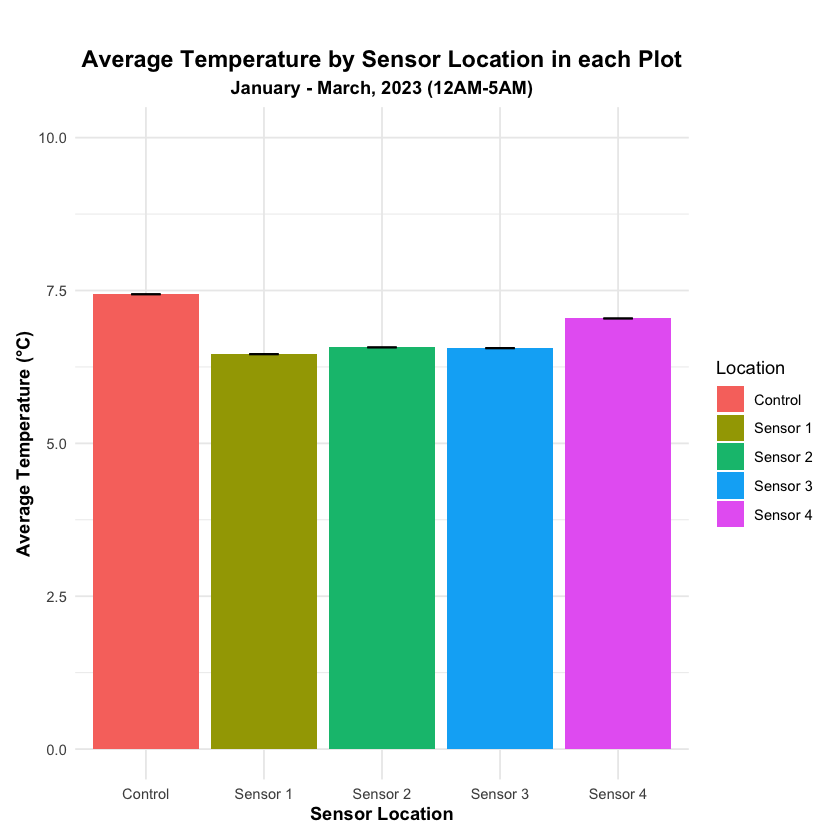

In [271]:
# Create a ggplot with error bars
ggplot(temperature_data, aes(x = Location, y = Average_Temperature, fill = Location)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymin = Average_Temperature - se_value, ymax = Average_Temperature + se_value),
                position = position_dodge2(width = 2.0),  # Adjust width as needed
                width = 0.25) +  # Adjust width as needed
  labs(title = "Average Temperature by Sensor Location in each Plot",
       subtitle = "January - March, 2023 (12AM-5AM)",
       x = "Sensor Location",
       y = "Average Temperature (°C)") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),  # Center the title
    plot.subtitle = element_text(face = "bold", hjust = 0.5),  # Center the subtitle
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    plot.margin = margin(t = 30, r = 10, b = 10, l = 10)  # Adjust top margin as needed
  ) +
  coord_cartesian(ylim = c(0, 10))


#### We wanted to find the average temperature for each of the five sensors in the three months of the data set. This was done to identify the coldest month out of the three.

#### We started out by extracting the data for each month from the original dataset. After the data for the entire month was extracted, we extracted all the data for each sensor in the month and then found the average temperature for each sensor. 

#### Our Process:
#### - Filtered the data out for each month
#### - Filtered out the columns for each sensor position from each plot
#### - Got the total average temp for each of the columns
#### - Extracted the average for each column and convert the column averages into a matrix to allow for efficient mathematical operations
#### - Assigned the matrix to a new variable
#### - Got overall average of new variable
#### - Repeated for each sensor in each month

In [272]:
head(Final_Data, n=3)

,Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-01-11 10:24:37,21.49,24.06,22.99,24.36,18.02,19.82,25.82,24.24,23.76,⋯,21.83,25.69,25.69,25.82,18.27,18.96,25.69,25.52,25.44,17.89
2,2023-01-11 10:25:37,21.79,24.06,22.95,24.28,18.19,19.99,25.82,24.24,23.85,⋯,21.49,25.57,25.65,25.52,18.32,18.74,25.69,25.44,25.35,18.06
3,2023-01-11 10:26:37,21.79,23.81,22.95,24.45,18.32,20.16,25.82,24.11,24.02,⋯,21.19,25.35,25.39,25.35,18.27,18.70,25.57,25.31,25.39,18.32


In [273]:
filtered_January <- Final_Data %>%
  filter(Date_Time_HST >= as.POSIXct("01/11/2023", format = "%m/%d/%Y") &
         Date_Time_HST <= as.POSIXct("01/31/2023", format = "%m/%d/%Y"))

In [274]:
head(filtered_January, n=3)

,Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-01-11 10:24:37,21.49,24.06,22.99,24.36,18.02,19.82,25.82,24.24,23.76,⋯,21.83,25.69,25.69,25.82,18.27,18.96,25.69,25.52,25.44,17.89
2,2023-01-11 10:25:37,21.79,24.06,22.95,24.28,18.19,19.99,25.82,24.24,23.85,⋯,21.49,25.57,25.65,25.52,18.32,18.74,25.69,25.44,25.35,18.06
3,2023-01-11 10:26:37,21.79,23.81,22.95,24.45,18.32,20.16,25.82,24.11,24.02,⋯,21.19,25.35,25.39,25.35,18.27,18.70,25.57,25.31,25.39,18.32


In [275]:
tail(filtered_January, n=3)

,Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28774,2023-01-31 09:57:37,16.39,17.80,18.40,18.23,16.73,17.11,15.78,15.96,15.61,⋯,12.35,12.65,12.87,13.04,12.27,11.32,12.18,12.10,12.05,11.75
28775,2023-01-31 09:58:37,16.56,17.84,18.44,18.32,16.81,16.86,15.61,15.74,15.40,⋯,12.31,12.65,12.91,13.04,12.18,11.28,12.10,12.05,11.97,11.67
28776,2023-01-31 09:59:37,16.69,17.76,18.53,18.32,16.94,16.69,15.44,15.57,15.18,⋯,12.27,12.70,12.91,13.04,12.22,11.32,12.10,12.01,11.97,11.67


In [276]:
averages_January <- filtered_January %>%
  summarise_all(mean, na.rm = TRUE)

In [277]:
averages_January

Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-01-21 10:12:07,11.77912,11.07951,11.83698,11.79615,10.93113,12.05338,11.98213,12.13869,11.9402,⋯,12.0182,11.74689,11.78685,11.93193,10.34147,11.6845,11.4437,11.11537,10.87605,10.04064


In [278]:
filtered_January_Control <- filtered_January %>%
  select("AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..")

In [279]:
head(filtered_January_Control, n=2)

,AC.Temperature.....C..,BC.Temperature.....C..,CC.Temperature.....C..,DC.Temperature.....C..
,<dbl>,<dbl>,<dbl>,<dbl>
1,21.49,19.82,21.83,18.96
2,21.79,19.99,21.49,18.74


In [280]:
averages_January_Control <- filtered_January_Control %>%
  summarise_all(mean, na.rm = TRUE)

In [281]:
averages_January_Control

AC.Temperature.....C..,BC.Temperature.....C..,CC.Temperature.....C..,DC.Temperature.....C..
<dbl>,<dbl>,<dbl>,<dbl>
11.77912,12.05338,12.0182,11.6845


In [282]:
numeric_January_C <- as.matrix(averages_January_Control[ , 1:4])

In [283]:
overall_average_January_C <- mean(numeric_January_C, na.rm = TRUE)

In [284]:
overall_average_January_C

[1] 11.8838

In [285]:
filtered_January_Sensor_1 <- filtered_January %>%
  select("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")

In [286]:
averages_January_Sensor_1 <- filtered_January_Sensor_1 %>%
  summarise_all(mean, na.rm = TRUE)

In [287]:
numeric_January_1 <- as.matrix(averages_January_Sensor_1[ , 1:4])

In [288]:
overall_average_January_1 <- mean(numeric_January_1, na.rm = TRUE)

In [289]:
overall_average_January_1

[1] 11.56306

In [290]:
filtered_January_Sensor_2 <- filtered_January %>%
  select("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")

In [291]:
averages_January_Sensor_2 <- filtered_January_Sensor_2 %>%
  summarise_all(mean, na.rm = TRUE)

In [292]:
numeric_January_2 <- as.matrix(averages_January_Sensor_2[ , 1:4])

In [293]:
overall_average_January_2 <- mean(numeric_January_2, na.rm = TRUE)

In [294]:
overall_average_January_2

[1] 11.71947

In [295]:
filtered_January_Sensor_3 <- filtered_January %>%
  select("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")

In [296]:
averages_January_Sensor_3 <- filtered_January_Sensor_3 %>%
  summarise_all(mean, na.rm = TRUE)

In [297]:
numeric_January_3 <- as.matrix(averages_January_Sensor_3[ , 1:4])

In [298]:
overall_average_January_3 <- mean(numeric_January_3, na.rm = TRUE)

In [299]:
overall_average_January_3

[1] 11.63608

In [300]:
filtered_January_Sensor_4 <- filtered_January %>%
  select("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")

In [301]:
head(filtered_January_Sensor_4, n=3)

,A4.Temperature...C..,B4.Temperature.....C..,C4.Temperature.....C..,D4.Temperature.....C..
,<dbl>,<dbl>,<dbl>,<dbl>
1,18.02,23.85,18.27,17.89
2,18.19,23.98,18.32,18.06
3,18.32,24.11,18.27,18.32


In [302]:
averages_January_Sensor_4 <- filtered_January_Sensor_4 %>%
  summarise_all(mean, na.rm = TRUE)

In [303]:
averages_January_Sensor_4

A4.Temperature...C..,B4.Temperature.....C..,C4.Temperature.....C..,D4.Temperature.....C..
<dbl>,<dbl>,<dbl>,<dbl>
10.93113,10.94083,10.34147,10.04064


In [304]:
numeric_January_4 <- as.matrix(averages_January_Sensor_4[ , 1:4])

In [305]:
overall_average_January_4 <- mean(numeric_January_4, na.rm = TRUE)

In [306]:
overall_average_January_4

[1] 10.56352

In [307]:
filtered_February <- Final_Data %>%
  filter(Date_Time_HST >= as.POSIXct("02/01/2023", format = "%m/%d/%Y") &
         Date_Time_HST <= as.POSIXct("02/28/2023", format = "%m/%d/%Y"))

In [308]:
head(filtered_February, n=3)

,Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-02-01 10:00:37,18.66,21.49,23.25,22.43,20.25,22.26,25.78,24.32,22.35,⋯,24.28,25.48,25.69,26.08,17.46,21.96,28.05,27.15,26.85,21.58
2,2023-02-01 10:01:37,18.70,21.70,23.38,22.39,20.33,22.18,25.95,24.32,22.48,⋯,24.02,25.74,25.78,26.34,17.46,22.18,27.97,27.11,26.64,21.49
3,2023-02-01 10:02:37,18.79,22.01,23.34,22.61,20.46,22.35,26.08,24.36,22.73,⋯,24.06,25.91,25.99,26.25,17.50,22.35,27.84,26.81,26.17,21.28


In [309]:
averages_February <- filtered_February %>%
  summarise_all(mean, na.rm = TRUE)

In [310]:
averages_February

Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-02-14 21:59:49,10.62529,10.64853,11.06814,10.99146,10.39406,10.5587,10.87676,10.9779,11.06019,⋯,10.70874,10.6625,10.91561,10.93965,9.560684,10.34658,10.80353,10.51387,10.5189,10.05244


In [311]:
filtered_February_Control <- filtered_February %>%
  select("AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..")

In [312]:
averages_February_Control <- filtered_February_Control %>%
  summarise_all(mean, na.rm = TRUE)

In [313]:
averages_February_Control

AC.Temperature.....C..,BC.Temperature.....C..,CC.Temperature.....C..,DC.Temperature.....C..
<dbl>,<dbl>,<dbl>,<dbl>
10.62529,10.5587,10.70874,10.34658


In [314]:
numeric_February_C <- as.matrix(averages_February_Control[ , 1:4])

In [315]:
overall_average_February_C <- mean(numeric_February_C, na.rm = TRUE)

In [316]:
overall_average_February_C

[1] 10.55983

In [317]:
filtered_February_1 <- filtered_February %>%
  select("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")

In [318]:
averages_February_1 <- filtered_February_1 %>%
  summarise_all(mean, na.rm = TRUE)

In [319]:
numeric_February_1 <- as.matrix(averages_February_1[ , 1:4])

In [320]:
overall_average_February_1 <- mean(numeric_February_1, na.rm = TRUE)

In [321]:
overall_average_February_1

[1] 10.74783

In [322]:
filtered_February_2 <- filtered_February %>%
  select("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")

In [323]:
averages_February_2 <- filtered_February_2 %>%
  summarise_all(mean, na.rm = TRUE)

In [324]:
numeric_February_2 <- as.matrix(averages_February_2[ , 1:4])

In [325]:
overall_average_February_2 <- mean(numeric_February_2, na.rm = TRUE)

In [326]:
overall_average_February_2

[1] 10.86888

In [327]:
filtered_February_3 <- filtered_February %>%
  select("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")

In [328]:
averages_February_3 <- filtered_February_3 %>%
  summarise_all(mean, na.rm = TRUE)

In [329]:
numeric_February_3 <- as.matrix(averages_February_3[ , 1:4])

In [330]:
overall_average_February_3 <- mean(numeric_February_3, na.rm = TRUE)

In [331]:
overall_average_February_3

[1] 10.87755

In [332]:
filtered_February_4 <- filtered_February %>%
  select("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")

In [333]:
averages_February_4 <- filtered_February_4 %>%
  summarise_all(mean, na.rm = TRUE)

In [334]:
averages_February_4 

A4.Temperature...C..,B4.Temperature.....C..,C4.Temperature.....C..,D4.Temperature.....C..
<dbl>,<dbl>,<dbl>,<dbl>
10.39406,10.29002,9.560684,10.05244


In [335]:
numeric_February_4 <- as.matrix(averages_February_4 [ , 1:4])

In [336]:
overall_average_February_4 <- mean(numeric_February_4, na.rm = TRUE)

In [337]:
overall_average_February_4

[1] 10.0743

In [338]:
filtered_March <- Final_Data %>%
  filter(Date_Time_HST >= as.POSIXct("03/01/2023", format = "%m/%d/%Y") &
         Date_Time_HST <= as.POSIXct("03/30/2023", format = "%m/%d/%Y"))

In [339]:
averages_March <- filtered_March %>%
  summarise_all(mean, na.rm = TRUE)

In [340]:
averages_March 

Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-03-15 19:02:56,13.18688,12.78569,13.23346,12.99422,12.66645,13.1403,13.45778,13.83071,13.64482,⋯,13.17387,12.97316,13.25992,13.37632,11.9579,12.67554,13.17068,12.84279,12.92717,12.40082


In [341]:
filtered_March_Control <- filtered_March %>%
  select("AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..")

In [342]:
averages_March_C <- filtered_March_Control %>%
  summarise_all(mean, na.rm = TRUE)

In [343]:
averages_March_C

AC.Temperature.....C..,BC.Temperature.....C..,CC.Temperature.....C..,DC.Temperature.....C..
<dbl>,<dbl>,<dbl>,<dbl>
13.18688,13.1403,13.17387,12.67554


In [344]:
numeric_March_C <- as.matrix(averages_March_C [ , 1:4])

In [345]:
overall_average_March_C <- mean(numeric_March_C, na.rm = TRUE)

In [346]:
overall_average_March_C

[1] 13.04415

In [347]:
filtered_March_1 <- filtered_March %>%
  select("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")

In [348]:
averages_March_1 <- filtered_March_1 %>%
  summarise_all(mean, na.rm = TRUE)

In [349]:
numeric_March_1 <- as.matrix(averages_March_1 [ , 1:4])

In [350]:
overall_average_March_1 <- mean(numeric_March_1, na.rm = TRUE)

In [351]:
overall_average_March_1

[1] 13.09683

In [352]:
filtered_March_2 <- filtered_March %>%
  select("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")

In [353]:
averages_March_2 <- filtered_March_1 %>%
  summarise_all(mean, na.rm = TRUE)

In [354]:
numeric_March_2 <- as.matrix(averages_March_2 [ , 1:4])

In [355]:
overall_average_March_2 <- mean(numeric_March_2, na.rm = TRUE)

In [356]:
overall_average_March_2

[1] 13.09683

In [357]:
filtered_March_3 <- filtered_March %>%
  select("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")

In [358]:
averages_March_3 <- filtered_March_3 %>%
  summarise_all(mean, na.rm = TRUE)

In [359]:
numeric_March_3 <- as.matrix(averages_March_3 [ , 1:4])

In [360]:
overall_average_March_3 <- mean(numeric_March_3, na.rm = TRUE)

In [361]:
overall_average_March_3

[1] 13.23563

In [362]:
filtered_March_4 <- filtered_March %>%
  select("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")

In [363]:
averages_March_4 <- filtered_March_4 %>%
  summarise_all(mean, na.rm = TRUE)

In [364]:
averages_March_4

A4.Temperature...C..,B4.Temperature.....C..,C4.Temperature.....C..,D4.Temperature.....C..
<dbl>,<dbl>,<dbl>,<dbl>
12.66645,12.63982,11.9579,12.40082


In [365]:
numeric_March_4 <- as.matrix(averages_March_4 [ , 1:4])

In [366]:
overall_average_March_4 <- mean(numeric_March_4, na.rm = TRUE)

In [367]:
overall_average_March_4

[1] 12.41625

In [368]:
# Overall Temps for Each Month
# Control
# January: 11.8837972616069
# February:10.5598277990689
# March: 13.0441485533498

#Sensor #1
# January: 11.563057235196
# February: 10.747831412845
# March: 13.0968257015891

# Sensor #2
# January: 11.719472824576
# Februry: 10.8688808868541
# March: 13.2917206443511

# Sensor #3
# January: 11.6360813698916
# February: 10.877550155611
# March: 13.2356338453364


# Sensor #4
# January: 10.5635172539616
# February: 10.0743011008514
# March: 12.4162480679129b

#### We then wanted to create a bar chart to show the difference in average temperature of each sensor for each month. 
#### We created a dataframe by creating 2 vectors, one for the sensors and one for the months.
#### We modified the dataframe to have a month column as a factor and the months as levels in order to allow for the correct order of variables on the x-axis.
#### We then created the bar chart using ggplot. 

In [369]:
temperature_data <- data.frame(
  Sensor = rep(c("Control", "Sensor #1", "Sensor #2", "Sensor #3", "Sensor #4"), each = 3),
  Month = rep(c("January", "February", "March"), times = 5),
  Average_Temperature = c(
    11.8837972616069, 10.5598277990689, 13.0441485533498,
    11.563057235196, 10.747831412845, 13.0968257015891,
    11.719472824576, 10.8688808868541, 13.2917206443511,
    11.6360813698916, 10.877550155611, 13.2356338453364,
    10.5635172539616, 10.0743011008514, 12.4162480679129
  )
)

In [370]:
temperature_data$Month <- factor(temperature_data$Month, levels = c("January", "February", "March"))

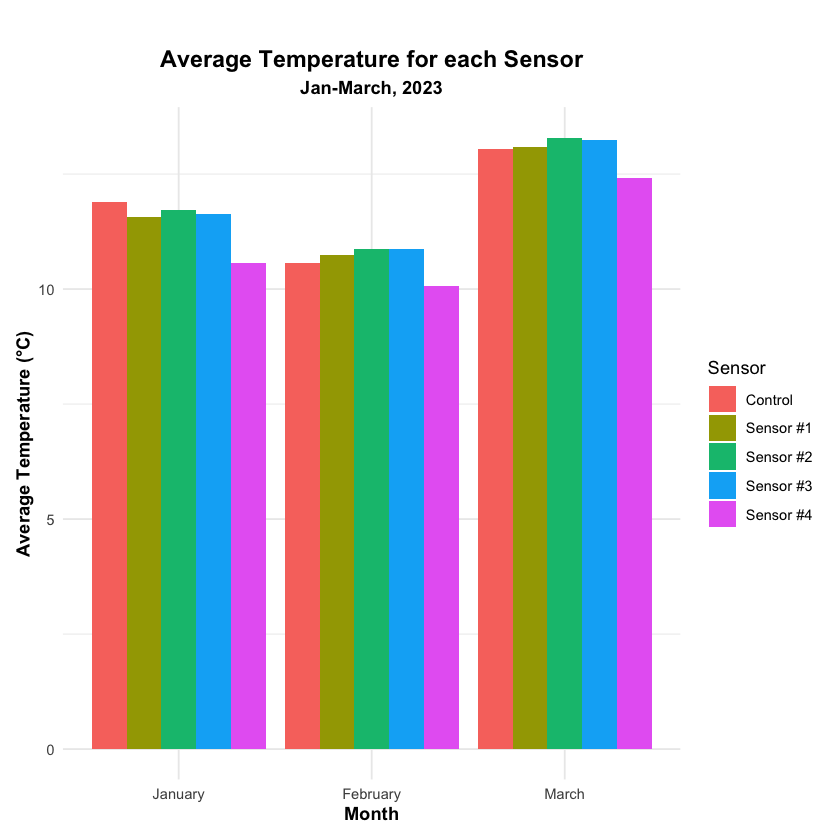

In [371]:
ggplot(temperature_data, aes(x = Month, y = Average_Temperature, fill = Sensor)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average Temperature for each Sensor",
       subtitle = "Jan-March, 2023",
       x = "Month",
       y = "Average Temperature (°C)") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),  
    plot.subtitle = element_text(face = "bold", hjust = 0.5),  
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    plot.margin = margin(t = 30, r = 10, b = 10, l = 10)  
  )

#### We wanted to find the day in February that had the lowest average temperature and to create a bar chart to show the lowest day found.
#### Our Process:
#### - Changed the format of the Date_Time_HST column in the dataframe into a date-time format
#### - Filtered out all of the data from February
#### - Partitioned the February data by day
#### - Created 28 empty vectors, 1 vector to store the data from each day in February
#### - Created a for-loop to store the data from each day into one of the 28 empty vectors
#### - Used which.min function to find the day in February that had the lowest average temperature
#### -Created a bar chart using lubridate and dplyr


In [372]:
library(lubridate)
library(dplyr)
Final_Data <- read.csv(file = "Copy of Final Gorse Temps 2023(copy).csv", header = TRUE)

In [373]:
class(Final_Data$Date_Time_HST)

[1] "character"

In [374]:
Final_Data <- Final_Data %>%
  mutate(Date_Time_HST = mdy_hms(Date_Time_HST))

In [375]:
class(Final_Data$Date_Time_HST)

[1] "POSIXct" "POSIXt"

In [376]:
filtered_february <- Final_Data %>%
  filter(format(Date_Time_HST, "%m") == "02") 

In [377]:
head(filtered_february, n=3)

,Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-02-01 00:00:37,9.18,7.89,8.11,8.11,8.32,9.65,8.19,8.45,8.41,⋯,9.09,8.49,8.62,8.66,8.49,9.22,7.98,7.89,7.76,8.11
2,2023-02-01 00:01:37,9.18,7.93,8.15,8.11,8.28,9.61,8.19,8.45,8.41,⋯,9.18,8.49,8.66,8.62,8.58,9.31,7.93,7.76,7.72,8.06
3,2023-02-01 00:02:37,9.18,7.89,8.06,8.11,8.23,9.61,8.23,8.45,8.45,⋯,9.26,8.49,8.62,8.62,8.53,9.39,7.85,7.72,7.68,8.06


In [378]:
tail(filtered_february, n=3)

,Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40317,2023-02-28 23:57:26,4.37,4.59,5.15,5.15,4.76,6,5.70,5.79,5.57,⋯,6.56,6.17,6.17,5.92,5.40,5.57,6.30,6.09,6.05,6.00
40318,2023-02-28 23:58:26,4.33,4.67,5.15,5.19,4.80,6,5.75,5.83,5.66,⋯,6.52,6.13,6.13,5.92,5.36,5.66,6.35,6.09,6.09,6.09
40319,2023-02-28 23:59:26,4.29,4.72,5.23,5.27,4.80,6,5.75,5.87,5.75,⋯,6.48,6.13,6.13,5.92,5.40,5.70,6.43,6.17,6.13,6.17


In [379]:
february_day_data <- split(filtered_february, as.factor(day(filtered_february$Date_Time_HST)))

In [380]:
day_data_frames <- vector("list", length = 28)

In [381]:
for (i in 1:28) {
  vector_name <- paste0("day_", i)
  day_data_frames[[i]] <- february_day_data[[i]]
  assign(vector_name, day_data_frames[[i]], envir = .GlobalEnv)
}

In [382]:
day_1

,Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-02-01 00:00:37,9.18,7.89,8.11,8.11,8.32,9.65,8.19,8.45,8.41,⋯,9.09,8.49,8.62,8.66,8.49,9.22,7.98,7.89,7.76,8.11
2,2023-02-01 00:01:37,9.18,7.93,8.15,8.11,8.28,9.61,8.19,8.45,8.41,⋯,9.18,8.49,8.66,8.62,8.58,9.31,7.93,7.76,7.72,8.06
3,2023-02-01 00:02:37,9.18,7.89,8.06,8.11,8.23,9.61,8.23,8.45,8.45,⋯,9.26,8.49,8.62,8.62,8.53,9.39,7.85,7.72,7.68,8.06
4,2023-02-01 00:03:37,9.18,7.89,8.11,8.11,8.28,9.65,8.23,8.45,8.45,⋯,9.31,8.49,8.58,8.58,8.53,9.48,7.85,7.68,7.63,8.06
5,2023-02-01 00:04:37,9.14,7.98,8.06,8.06,8.23,9.65,8.23,8.49,8.49,⋯,9.26,8.45,8.58,8.62,8.53,9.44,7.81,7.68,7.59,8.02
6,2023-02-01 00:05:37,9.18,7.93,8.06,8.11,8.19,9.61,8.28,8.45,8.53,⋯,9.26,8.41,8.58,8.58,8.53,9.35,7.81,7.68,7.59,8.02
7,2023-02-01 00:06:37,9.14,7.89,8.06,8.11,8.23,9.56,8.28,8.49,8.49,⋯,9.18,8.49,8.58,8.58,8.49,9.22,7.81,7.63,7.63,7.98
8,2023-02-01 00:07:37,9.09,7.93,8.06,8.06,8.19,9.48,8.28,8.49,8.53,⋯,9.18,8.41,8.58,8.53,8.53,9.14,7.76,7.63,7.55,7.93
9,2023-02-01 00:08:37,9.09,7.93,8.11,8.11,8.19,9.52,8.32,8.53,8.58,⋯,9.18,8.41,8.58,8.62,8.49,9.01,7.76,7.63,7.55,7.98


In [383]:
# Create an empty vector to store average temperatures
average_temperatures <- numeric(28)

In [384]:
# Columns to be used for the average calculation
columns_of_interest <- c("A1.Temperature.....C..", "A2.Temperature.....C..", "A2.Temperature.....C..","A4.Temperature...C..", "B1.Temperature.....C.","B2.Temperature.....C..", "B3.Temperature.....C..","B4.Temperature.....C..", "C1.Temperature.....C..", "C2.Temperature.....C..", "C3.Temperature.....C..", "C4.Temperature.....C..", "D1.Temperature.....C..", "D2.Temperature.....C..", "D3.Temperature.....C..", "D4.Temperature.....C..")

In [385]:
for (i in 1:28) {
  vector_name <- paste0("day_", i)
  day_data <- get(vector_name)
     # Select relevant columns and calculate the row-wise mean
  row_means <- rowMeans(day_data[, columns_of_interest], na.rm = TRUE)
  
  # Store the overall average for the day
  average_temperatures[i] <- mean(row_means, na.rm = TRUE)
}

In [386]:
average_temperatures

[1] 12.149304 11.395280 12.303270 12.711178 11.765197 12.102113 10.878903
 [8] 10.417966 10.190393  8.362066  9.649865  8.584710  9.664555  9.732360
[15]  9.900155  9.096127 10.757162 10.067754 12.293649 10.906104 11.681895
[22] 12.504408 11.193713 10.976614 10.073525 10.601247  9.225711  7.571734

In [387]:
day_with_lowest_average <- which.min(average_temperatures)

In [388]:
day_with_lowest_average

[1] 28

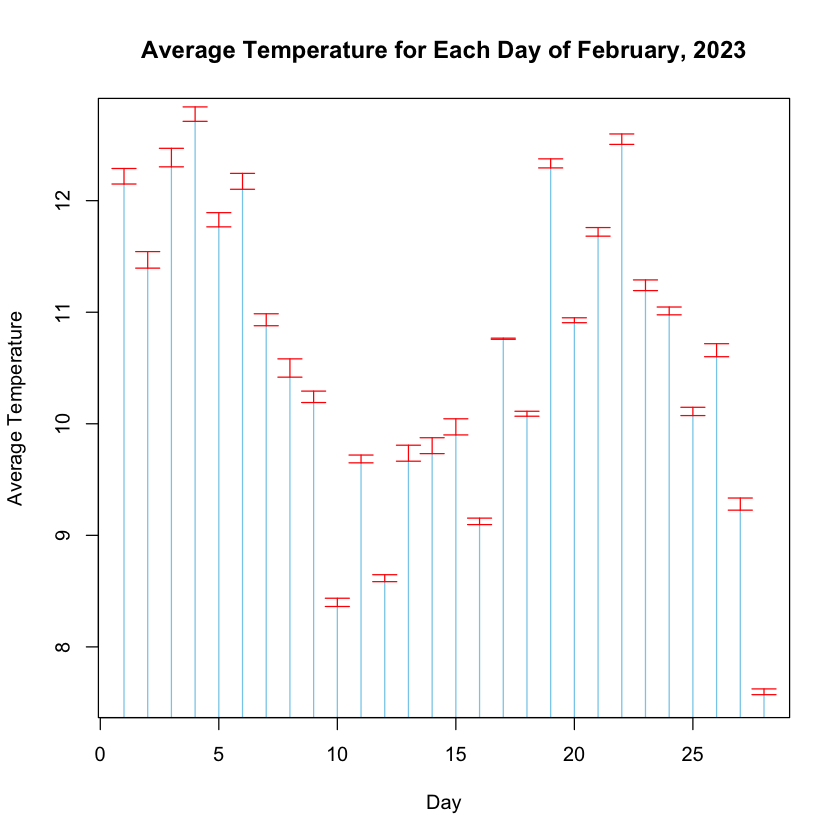

In [389]:
library(lubridate)
library(dplyr)

# ... (your existing code for reading and filtering the data)

# Create a list to store day data frames
february_day_data <- lapply(1:28, function(day) {
  filtered_february %>%
    filter(day(Date_Time_HST) == day)
})

# Initialize vectors to store average temperatures and standard errors
average_temperatures <- numeric(28)
standard_errors <- numeric(28)

# Loop through the day data frames
for (i in 1:28) {
  day_data <- february_day_data[[i]]
  
  # Select relevant columns and calculate the row-wise mean
  row_means <- rowMeans(day_data[, columns_of_interest], na.rm = TRUE)
  
  # Calculate the standard error for the day
  standard_error <- sd(row_means, na.rm = TRUE) / sqrt(length(row_means))
  standard_errors[i] <- standard_error
  
  # Store the overall average for the day
  average_temperatures[i] <- mean(row_means, na.rm = TRUE)
}

# Plotting with error bars using plot function
plot(average_temperatures, 
     type = "h",
     col = "skyblue",
     main = "Average Temperature for Each Day of February, 2023",
     xlab = "Day",
     ylab = "Average Temperature")

# Add error bars above the bars using arrows
arrows(x0 = 1:28, y0 = average_temperatures, 
       x1 = 1:28, y1 = average_temperatures + standard_errors,
       angle = 90, code = 3, length = 0.1, col = "red")

#### We wanted to compare the sensors on the coldest day of the year to see if....
#### 1) The average of the control sensors continued to be most similar to the avergae of the #4 sensors.
#### 2) If the control and #4 sensors remianed most similar, to see if they had a higher or lower average temperature when compared to sensors #1, #2, & #3

#### Our Process:
#### - Created a vector to specify the columns from the 28th day of February that we wanted the averages of.
#### - Used ʻrowMeans function to calculate the row-wise averages in the specified columns. This was done for each sensor on day #28 of february.
#### - Using ggplot we showed the average temp for the control sensors throughout the 24 hours of the 28th day of February and made multiple graphs to compare the average temperature line of the control to the average temperature lines of sensors #1, #2, #3, & #4.


In [390]:
february_data <- read.csv("path/to/filtered_february_data.csv")

In [391]:
february_data

Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,CC.Temperature.....C..,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-02-01 00:00:37,9.18,7.89,8.11,8.11,8.32,9.65,8.19,8.45,8.41,⋯,9.09,8.49,8.62,8.66,8.49,9.22,7.98,7.89,7.76,8.11
2023-02-01 00:01:37,9.18,7.93,8.15,8.11,8.28,9.61,8.19,8.45,8.41,⋯,9.18,8.49,8.66,8.62,8.58,9.31,7.93,7.76,7.72,8.06
2023-02-01 00:02:37,9.18,7.89,8.06,8.11,8.23,9.61,8.23,8.45,8.45,⋯,9.26,8.49,8.62,8.62,8.53,9.39,7.85,7.72,7.68,8.06
2023-02-01 00:03:37,9.18,7.89,8.11,8.11,8.28,9.65,8.23,8.45,8.45,⋯,9.31,8.49,8.58,8.58,8.53,9.48,7.85,7.68,7.63,8.06
2023-02-01 00:04:37,9.14,7.98,8.06,8.06,8.23,9.65,8.23,8.49,8.49,⋯,9.26,8.45,8.58,8.62,8.53,9.44,7.81,7.68,7.59,8.02
2023-02-01 00:05:37,9.18,7.93,8.06,8.11,8.19,9.61,8.28,8.45,8.53,⋯,9.26,8.41,8.58,8.58,8.53,9.35,7.81,7.68,7.59,8.02
2023-02-01 00:06:37,9.14,7.89,8.06,8.11,8.23,9.56,8.28,8.49,8.49,⋯,9.18,8.49,8.58,8.58,8.49,9.22,7.81,7.63,7.63,7.98
2023-02-01 00:07:37,9.09,7.93,8.06,8.06,8.19,9.48,8.28,8.49,8.53,⋯,9.18,8.41,8.58,8.53,8.53,9.14,7.76,7.63,7.55,7.93
2023-02-01 00:08:37,9.09,7.93,8.11,8.11,8.19,9.52,8.32,8.53,8.58,⋯,9.18,8.41,8.58,8.62,8.49,9.01,7.76,7.63,7.55,7.98


In [392]:
library(dplyr)

In [393]:
library(lubridate)

In [394]:
february_data$Date_Time_HST <- ymd_hms(february_data$Date_Time_HST)

In [395]:
str(february_data$Date_Time_HST)

 POSIXct[1:40319], format: "2023-02-01 00:00:37" "2023-02-01 00:01:37" "2023-02-01 00:02:37" ...


In [396]:
february_day_data <- february_data %>%
  group_by(day = day(Date_Time_HST)) %>%
  filter(day %in% 1:28) %>%
  ungroup()

In [397]:
february_day_data

Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..,day
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2023-02-01 00:00:37,9.18,7.89,8.11,8.11,8.32,9.65,8.19,8.45,8.41,⋯,8.49,8.62,8.66,8.49,9.22,7.98,7.89,7.76,8.11,1
2023-02-01 00:01:37,9.18,7.93,8.15,8.11,8.28,9.61,8.19,8.45,8.41,⋯,8.49,8.66,8.62,8.58,9.31,7.93,7.76,7.72,8.06,1
2023-02-01 00:02:37,9.18,7.89,8.06,8.11,8.23,9.61,8.23,8.45,8.45,⋯,8.49,8.62,8.62,8.53,9.39,7.85,7.72,7.68,8.06,1
2023-02-01 00:03:37,9.18,7.89,8.11,8.11,8.28,9.65,8.23,8.45,8.45,⋯,8.49,8.58,8.58,8.53,9.48,7.85,7.68,7.63,8.06,1
2023-02-01 00:04:37,9.14,7.98,8.06,8.06,8.23,9.65,8.23,8.49,8.49,⋯,8.45,8.58,8.62,8.53,9.44,7.81,7.68,7.59,8.02,1
2023-02-01 00:05:37,9.18,7.93,8.06,8.11,8.19,9.61,8.28,8.45,8.53,⋯,8.41,8.58,8.58,8.53,9.35,7.81,7.68,7.59,8.02,1
2023-02-01 00:06:37,9.14,7.89,8.06,8.11,8.23,9.56,8.28,8.49,8.49,⋯,8.49,8.58,8.58,8.49,9.22,7.81,7.63,7.63,7.98,1
2023-02-01 00:07:37,9.09,7.93,8.06,8.06,8.19,9.48,8.28,8.49,8.53,⋯,8.41,8.58,8.53,8.53,9.14,7.76,7.63,7.55,7.93,1
2023-02-01 00:08:37,9.09,7.93,8.11,8.11,8.19,9.52,8.32,8.53,8.58,⋯,8.41,8.58,8.62,8.49,9.01,7.76,7.63,7.55,7.98,1


In [398]:
day_28_data <- february_day_data %>%
  filter(day == 28)

In [399]:
day_28_data

Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..,day
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2023-02-28 00:00:26,6.86,6.52,6.43,6.39,6.13,6.39,6.56,6.60,6.43,⋯,6.69,6.73,6.60,6.43,6.43,6.69,6.43,6.35,6.39,28
2023-02-28 00:01:26,6.86,6.39,6.43,6.35,6.13,6.35,6.56,6.56,6.48,⋯,6.73,6.69,6.60,6.48,6.43,6.65,6.43,6.39,6.39,28
2023-02-28 00:02:26,6.90,6.39,6.35,6.35,6.05,6.39,6.56,6.69,6.48,⋯,6.69,6.73,6.60,6.48,6.35,6.65,6.43,6.39,6.39,28
2023-02-28 00:03:26,6.82,6.35,6.35,6.30,6.09,6.39,6.56,6.65,6.43,⋯,6.69,6.69,6.65,6.48,6.35,6.60,6.39,6.39,6.35,28
2023-02-28 00:04:26,6.86,6.30,6.39,6.35,6.09,6.39,6.65,6.60,6.48,⋯,6.73,6.69,6.65,6.52,6.35,6.60,6.35,6.39,6.39,28
2023-02-28 00:05:26,6.82,6.30,6.35,6.30,6.09,6.39,6.60,6.65,6.52,⋯,6.73,6.69,6.65,6.56,6.35,6.65,6.43,6.35,6.35,28
2023-02-28 00:06:26,6.86,6.26,6.39,6.35,6.05,6.35,6.65,6.65,6.52,⋯,6.73,6.73,6.69,6.52,6.35,6.60,6.43,6.35,6.39,28
2023-02-28 00:07:26,6.82,6.22,6.39,6.35,6.09,6.39,6.60,6.60,6.52,⋯,6.69,6.69,6.65,6.52,6.39,6.60,6.39,6.35,6.39,28
2023-02-28 00:08:26,6.82,6.26,6.43,6.35,6.09,6.35,6.65,6.65,6.52,⋯,6.73,6.69,6.69,6.52,6.35,6.65,6.43,6.35,6.35,28


In [400]:
library(ggplot2)

In [401]:
specified_columns <- c("AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..")

row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

In [402]:
head(row_averages_control)

[1] 6.6025 6.5925 6.5925 6.5850 6.5825 6.5850

In [403]:
specified_columns <- c("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")

row_averages_S1 <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

In [404]:
head(row_averages_S1, n=3)


[1] 6.6150 6.5825 6.5725

In [405]:
specified_columns <- c("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")


row_averages_S2 <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

In [406]:
specified_columns <- c("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")


row_averages_S3 <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

In [407]:
specified_columns <- c("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")


row_averages_S4 <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

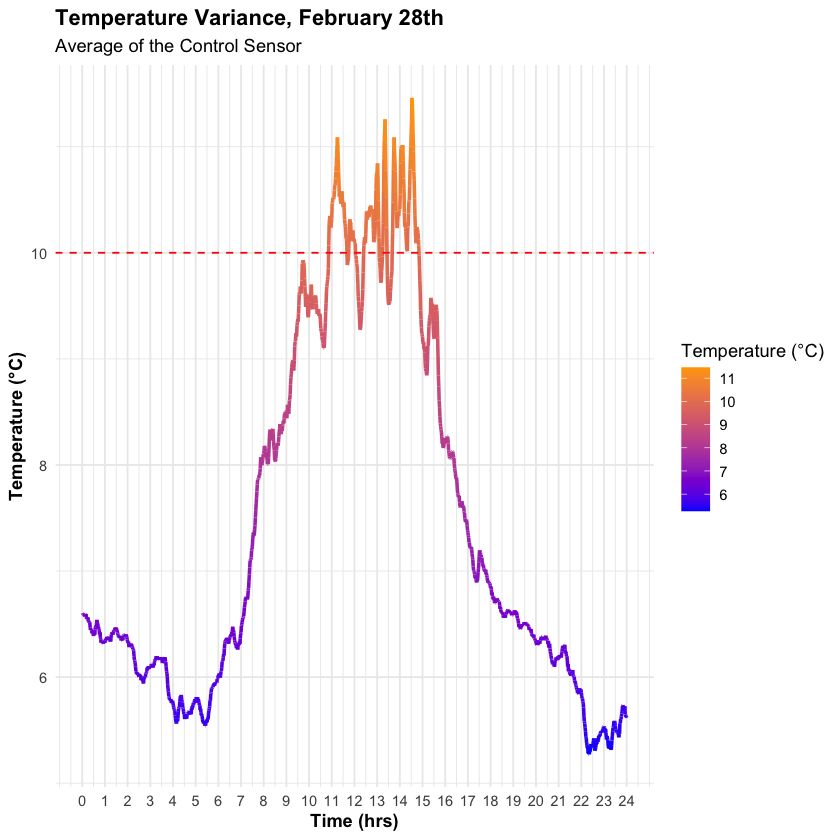

In [408]:
ggplot(data.frame(y = row_averages_control), aes(x = seq_along(row_averages_control), y = row_averages_control, color = row_averages_control)) +
  
  geom_line(size = 1) +
  
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)") +
  
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, February 28th",
       subtitle = "Average of the Control Sensor") +
  
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold")
  ) +

  scale_x_continuous(breaks = seq(0, max(seq_along(row_averages_control)), by = 60),
                     labels = seq(0, max(seq_along(row_averages_control))/60))

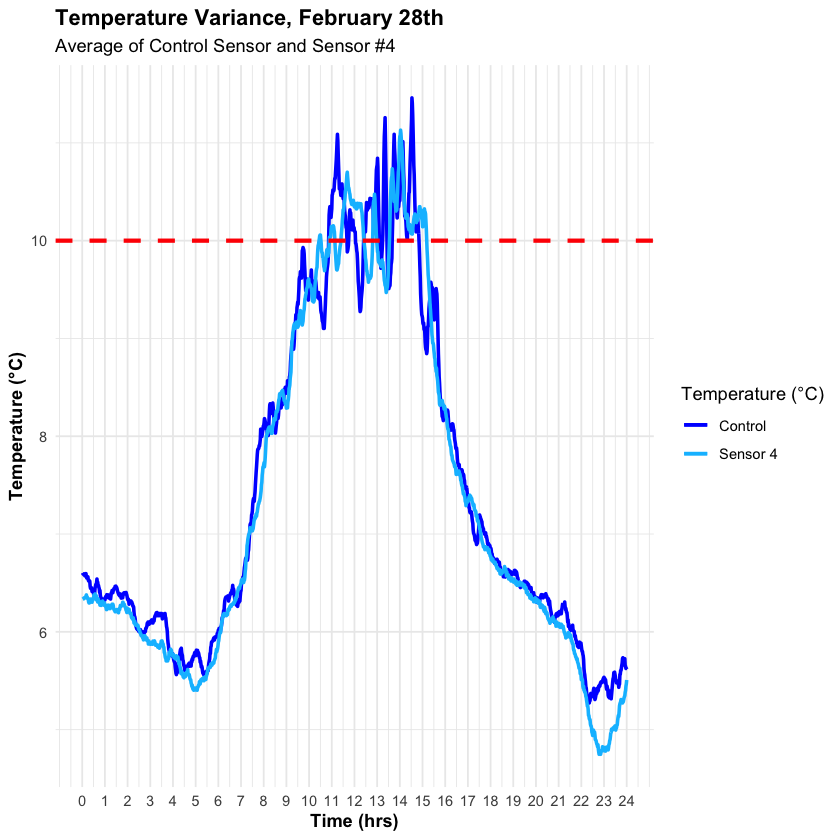

In [409]:
ggplot() +

  geom_line(aes(x = seq_along(row_averages_control), y = row_averages_control, color = "Control"), size = 1) +
  
  geom_line(aes(x = seq_along(row_averages_S4), y = row_averages_S4, color = "Sensor 4"), size = 1) +
  
  geom_hline(yintercept = 10, linetype = "dashed", color = "red", size = 1.2) +
  
  scale_color_manual(values = c("Control" = "blue", "Sensor 4" = "deepskyblue"), name = "Temperature (°C)") +
  
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, February 28th",
       subtitle = "Average of Control Sensor and Sensor #4") +
  
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold")
  ) +
  
  scale_x_continuous(breaks = seq(0, max(length(row_averages_control), length(row_averages_S4)), by = 60),
                     labels = seq(0, max(length(row_averages_control), length(row_averages_S4))/60))

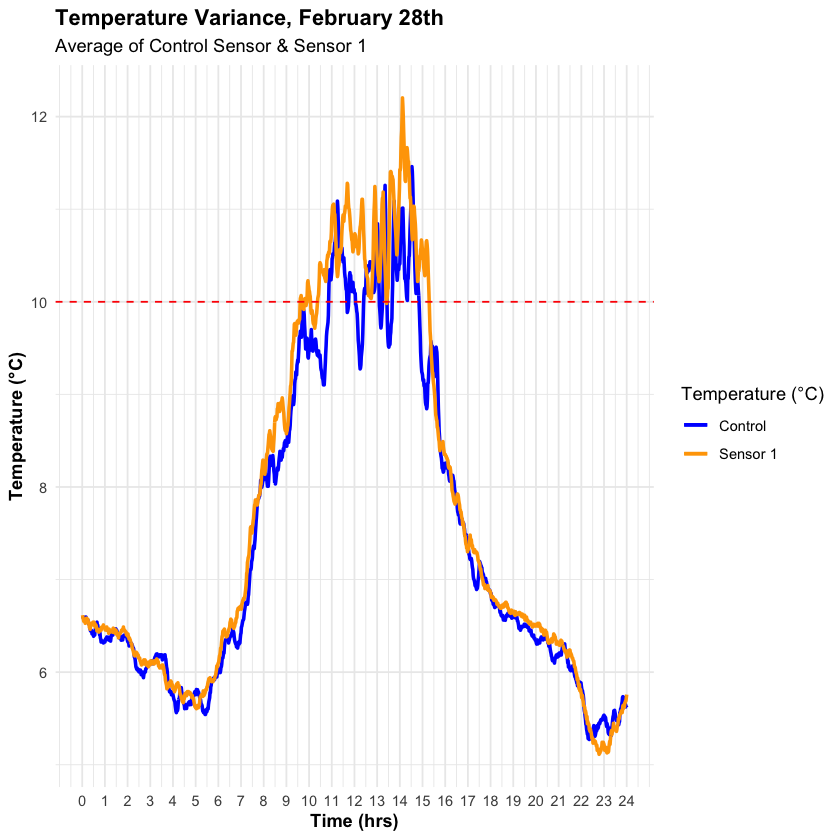

In [410]:
ggplot() +
  
  geom_line(aes(x = seq_along(row_averages_control), y = row_averages_control, color = "Control"), size = 1) +
  
  geom_line(aes(x = seq_along(row_averages_S1), y = row_averages_S1, color = "Sensor 1"), size = 1) +
  
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  scale_color_manual(values = c("Control" = "blue", "Sensor 1" = "orange"), name = "Temperature (°C)") +
  
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, February 28th",
       subtitle = "Average of Control Sensor & Sensor 1") +
  
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold")
  ) +
  
  scale_x_continuous(breaks = seq(0, max(length(row_averages_control), length(row_averages_S1)), by = 60),
                     labels = seq(0, max(length(row_averages_control), length(row_averages_S1))/60))

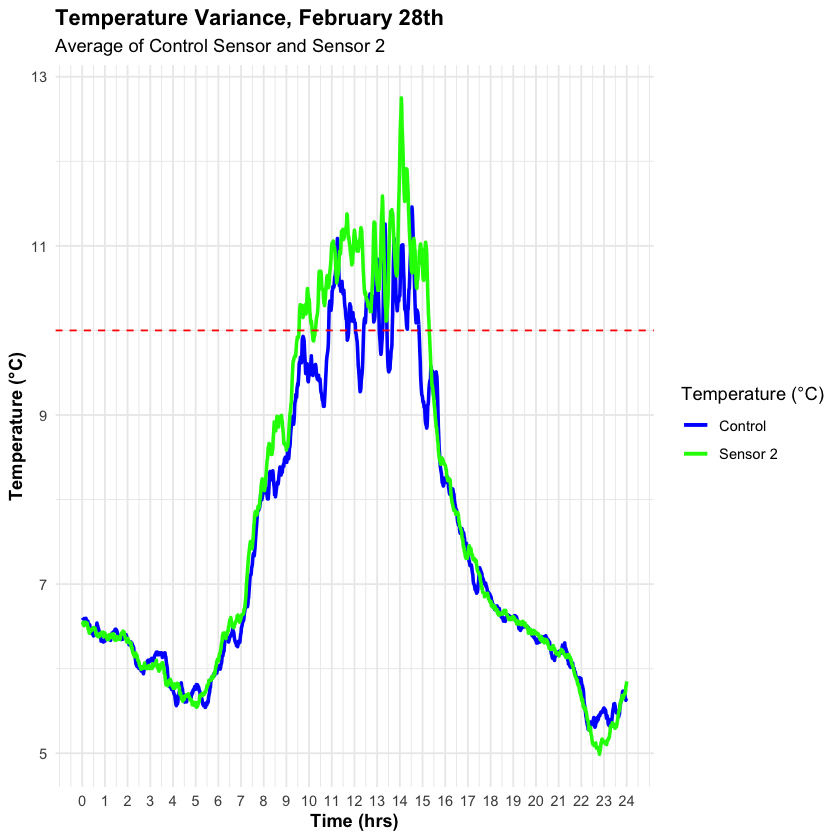

In [411]:

ggplot() +
  
  geom_line(aes(x = seq_along(row_averages_control), y = row_averages_control, color = "Control"), size = 1) +
  
  geom_line(aes(x = seq_along(row_averages_S2), y = row_averages_S2, color = "Sensor 2"), size = 1) +
  
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  scale_color_manual(values = c("Control" = "blue", "Sensor 2" = "green"), name = "Temperature (°C)") +
  
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, February 28th",
       subtitle = "Average of Control Sensor and Sensor 2") +
  
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold")
  ) +
  
  scale_x_continuous(breaks = seq(0, max(length(row_averages_control), length(row_averages_S1)), by = 60),
                     labels = seq(0, max(length(row_averages_control), length(row_averages_S1))/60))

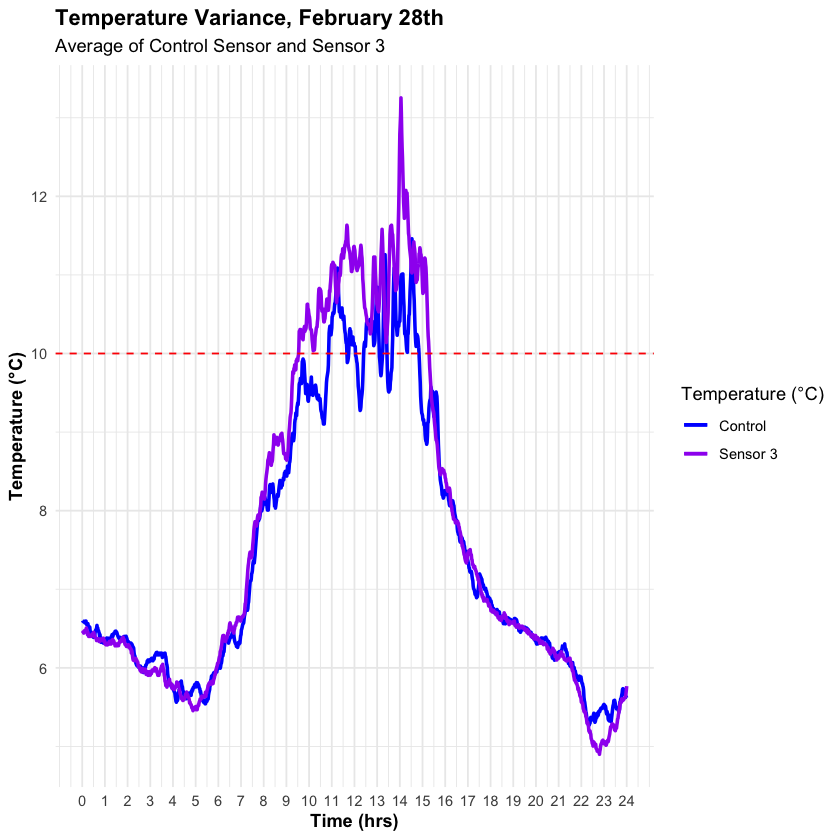

In [412]:
ggplot() +
  
  geom_line(aes(x = seq_along(row_averages_control), y = row_averages_control, color = "Control"), size = 1) +
  
  geom_line(aes(x = seq_along(row_averages_S3), y = row_averages_S3, color = "Sensor 3"), size = 1) +
  
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  scale_color_manual(values = c("Control" = "blue", "Sensor 3" = "purple"), name = "Temperature (°C)") +
  
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, February 28th",
       subtitle = "Average of Control Sensor and Sensor 3") +
  
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold")
  ) +
  
  scale_x_continuous(breaks = seq(0, max(length(row_averages_control), length(row_averages_S3)), by = 60),
                     labels = seq(0, max(length(row_averages_control), length(row_averages_S3))/60))

### We then compared the avergae of sensor #1 to the average of sensor #4 using the same coding process as described above.

Warning message in geom_text(aes(x = length(row_averages_S1), y = max(row_averages_S1), :
“Ignoring unknown parameters: `face`”
Warning message in geom_text(aes(x = length(row_averages_S4), y = max(row_averages_S4), :
“Ignoring unknown parameters: `face`”


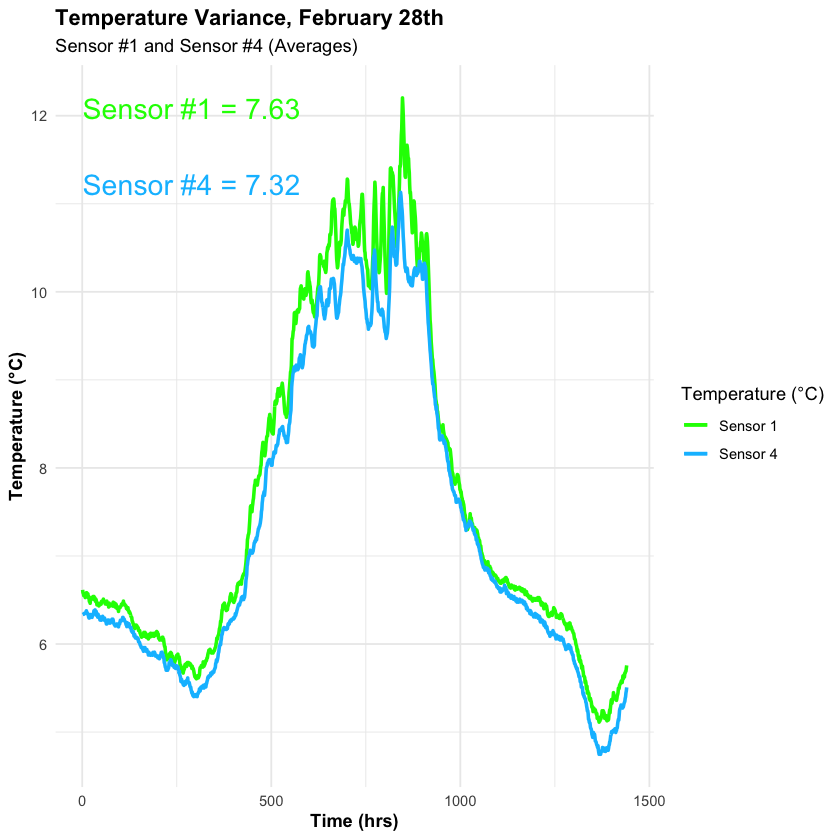

In [413]:
ggplot() +
 
  geom_line(aes(x = seq_along(row_averages_S1), y = row_averages_S1, color = "Sensor 1"), size = 1) +
  
  geom_line(aes(x = seq_along(row_averages_S4), y = row_averages_S4, color = "Sensor 4"), size = 1) +
  
  geom_text(aes(x = length(row_averages_S1), y = max(row_averages_S1), 
                label = paste("Sensor #1 =", round(mean(row_averages_S1), 2))),
            vjust = 1, hjust = 2.5, color = "green", size = 6, face = "bold") +
  
  geom_text(aes(x = length(row_averages_S4), y = max(row_averages_S4), 
                label = paste("Sensor #4 =", round(mean(row_averages_S4), 2))),
            vjust = 0.10, hjust = 2.5, color = "deepskyblue", size = 6, face = "bold") +
  
  scale_color_manual(values = c("Sensor 1" = "green", "Sensor 4" = "deepskyblue"), name = "Temperature (°C)") +
  
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, February 28th",
       subtitle = "Sensor #1 and Sensor #4 (Averages)") +
  
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold")
  )

In [414]:
# Perform a t-test
t_test_result <- t.test(row_averages_S1, row_averages_S4)

# Print the t-test result
cat("T-Test Result:\n")
print(t_test_result)

T-Test Result:

	Welch Two Sample t-test

data:  row_averages_S1 and row_averages_S4
t = 4.5399, df = 2860.4, p-value = 5.861e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1777029 0.4479047
sample estimates:
mean of x mean of y 
 7.634691  7.321887 



### We performed a t-test to compare the means of sensor #1 to sensort #4. The low p-value shows we can reject the null hypothesis and that the means of the two sensors are significantly different with 95% confidence interval.  

#### We wanted to show the average temperature for each sensor position across all four plots and to calculate and display the max temp on the our graph.
#### Process: 
#### - Made a vector that contained all of the columns for each individual sensor in each plot.
#### - Used the function “sapply” to convert the values in the previously made vector into numeric values and to find the max temp in each column.
#### - Used a for loop to scan each temperature column for the highest temperature.
#### - Used “mean” function  to calculate the average of these highest temperatures.
#### - Converted the values in the day_28_data dataframe temperature columns into a numeric format.
#### - Changed the format of the Date_Time_HST column in the dataframe into a date-time format, POSIXct.
#### - Calculated the average of each row for the specified columns for each individual sensor using “rowMeans” function.
#### - Used ggplot to show average temp for the sensor for each hour on day #28, and used the average max temp calculation to display the value at the top of the graph.


In [415]:
temperature_columns <- c('AC.Temperature.....C..', 'BC.Temperature.....C..', 'CC.Temperature.....C..', 'DC.Temperature.....C..')

max_temperatures <- sapply(day_28_data[temperature_columns], function(column) max(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Highest temperature in", temperature_columns[i], ":", max_temperatures[i], "°C\n")
}

average_highest_temp <- mean(max_temperatures, na.rm = TRUE)
                           
cat("Average of highest temperatures:", average_highest_temp, "°C\n")

Highest temperature in AC.Temperature.....C.. : 14.84 °C
Highest temperature in BC.Temperature.....C.. : 14.41 °C
Highest temperature in CC.Temperature.....C.. : 15.36 °C
Highest temperature in DC.Temperature.....C.. : 14.84 °C
Average of highest temperatures: 14.8625 °C


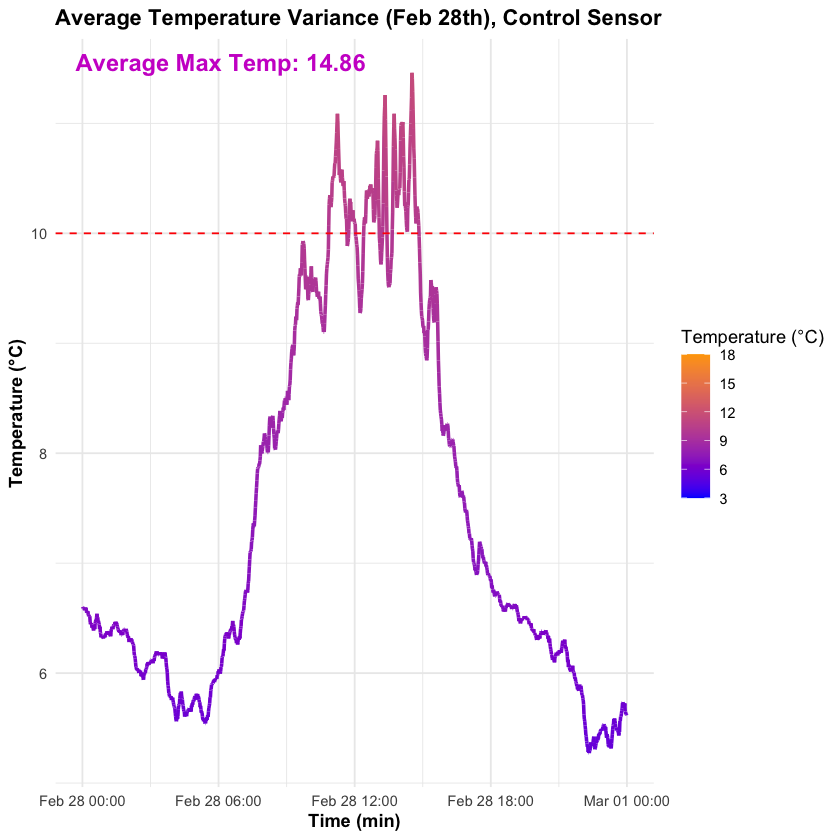

In [416]:
# Convert the specified temperature columns to numeric
specified_columns_S4 <- c("AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..")
day_28_data[, specified_columns_S4] <- lapply(day_28_data[, specified_columns_S4], as.numeric)

# Convert Date_Time_HST to POSIXct format
day_28_data$Date_Time_HST <- as.POSIXct(day_28_data$Date_Time_HST)

# Calculate the average of every row across specified columns for Sensor 4
day_28_data$row_averages_S4 <- rowMeans(day_28_data[, specified_columns_S4], na.rm = TRUE)

# Create a ggplot with average temperature values for Sensor 4
graph <- ggplot(day_28_data, aes(x = Date_Time_HST, y = row_averages_S4)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(aes(color = row_averages_S4), size = 1) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(3, 18)) +
  
  # Customize the plot labels and title
  labs(x = "Time (min)", y = "Temperature (°C)", title = paste("Average Temperature Variance (Feb 28th), Control Sensor")) +
  
annotate("text", x = max(day_28_data$Date_Time_HST), y = 10.4, hjust = 1.9
         , vjust = -7,
           label = paste("Average Max Temp:", round(average_highest_temp, 2)),
           color = "magenta3", size = 5, fontface = "bold") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold")
  )# Convert the specified temperature columns to numeric
specified_columns_S4 <- c("AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..")
day_28_data[, specified_columns_S4] <- lapply(day_28_data[, specified_columns_S4], as.numeric)

# Convert Date_Time_HST to POSIXct format
day_28_data$Date_Time_HST <- as.POSIXct(day_28_data$Date_Time_HST)

# Calculate the average of every row across specified columns for Sensor 4
day_28_data$row_averages_S4 <- rowMeans(day_28_data[, specified_columns_S4], na.rm = TRUE)

# Create a ggplot with average temperature values for Sensor 4
graph <- ggplot(day_28_data, aes(x = Date_Time_HST, y = row_averages_S4)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(aes(color = row_averages_S4), size = 1) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(3, 18)) +
  
  # Customize the plot labels and title
  labs(x = "Time (min)", y = "Temperature (°C)", title = paste("Average Temperature Variance (Feb 28th), Control Sensor")) +
  
annotate("text", x = max(day_28_data$Date_Time_HST), y = 10.4, hjust = 1.9
         , vjust = -7,
           label = paste("Average Max Temp:", round(average_highest_temp, 2)),
           color = "magenta3", size = 5, fontface = "bold") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold")
  )

print(graph)




In [417]:
temperature_columns <- c("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")

max_temperatures <- sapply(day_28_data[temperature_columns], function(column) max(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Highest temperature in", temperature_columns[i], ":", max_temperatures[i], "°C\n")
}

average_highest_temp <- mean(max_temperatures, na.rm = TRUE)

cat("Average of highest temperatures:", average_highest_temp, "°C\n")

Highest temperature in A1.Temperature.....C.. : 15.48 °C
Highest temperature in B1.Temperature.....C. : 15.83 °C
Highest temperature in C1.Temperature.....C.. : 14.71 °C
Highest temperature in D1.Temperature.....C.. : 14.15 °C
Average of highest temperatures: 15.0425 °C


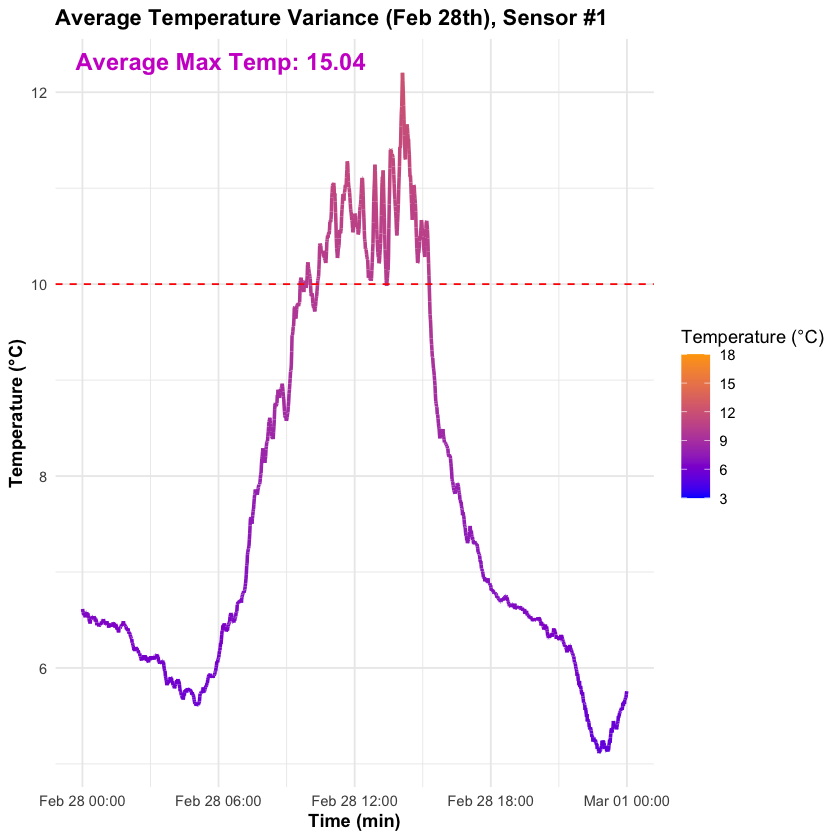

In [418]:
# Convert the specified temperature columns to numeric
specified_columns_S4 <- c("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")
day_28_data[, specified_columns_S4] <- lapply(day_28_data[, specified_columns_S4], as.numeric)

# Convert Date_Time_HST to POSIXct format
day_28_data$Date_Time_HST <- as.POSIXct(day_28_data$Date_Time_HST)

# Calculate the average of every row across specified columns for Sensor 4
day_28_data$row_averages_S4 <- rowMeans(day_28_data[, specified_columns_S4], na.rm = TRUE)

# Create a ggplot with average temperature values for Sensor 4
graph <- ggplot(day_28_data, aes(x = Date_Time_HST, y = row_averages_S4)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(aes(color = row_averages_S4), size = 1) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(3, 18)) +
  
  # Customize the plot labels and title
  labs(x = "Time (min)", y = "Temperature (°C)", title = paste("Average Temperature Variance (Feb 28th), Sensor #1")) +
  
annotate("text", x = max(day_28_data$Date_Time_HST), y = 11.0, hjust = 1.9
         , vjust = -7,
           label = paste("Average Max Temp:", round(average_highest_temp, 2)),
           color = "magenta3", size = 5, fontface = "bold") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold")
  )

print(graph)

In [419]:
temperature_columns <- c("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")

max_temperatures <- sapply(day_28_data[temperature_columns], function(column) max(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Highest temperature in", temperature_columns[i], ":", max_temperatures[i], "°C\n")
}

average_highest_temp <- mean(max_temperatures, na.rm = TRUE)

cat("Average of highest temperatures:", average_highest_temp, "°C\n")

Highest temperature in A2.Temperature.....C.. : 16.51 °C
Highest temperature in B2.Temperature.....C.. : 15.1 °C
Highest temperature in C2.Temperature.....C.. : 16.47 °C
Highest temperature in D2.Temperature.....C.. : 13.64 °C
Average of highest temperatures: 15.43 °C


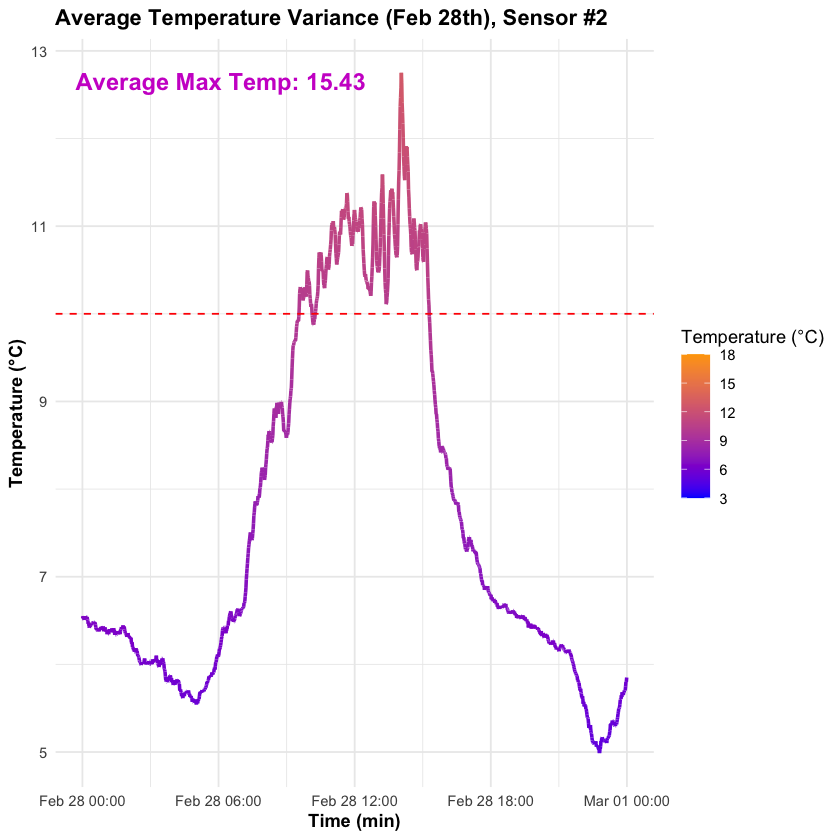

In [420]:
# Convert the specified temperature columns to numeric
specified_columns_S4 <- c("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")
day_28_data[, specified_columns_S4] <- lapply(day_28_data[, specified_columns_S4], as.numeric)

# Convert Date_Time_HST to POSIXct format
day_28_data$Date_Time_HST <- as.POSIXct(day_28_data$Date_Time_HST)

# Calculate the average of every row across specified columns for Sensor 4
day_28_data$row_averages_S4 <- rowMeans(day_28_data[, specified_columns_S4], na.rm = TRUE)

# Create a ggplot with average temperature values for Sensor 4
graph <- ggplot(day_28_data, aes(x = Date_Time_HST, y = row_averages_S4)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(aes(color = row_averages_S4), size = 1) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(3, 18)) +
  
  # Customize the plot labels and title
  labs(x = "Time (min)", y = "Temperature (°C)", title = paste("Average Temperature Variance (Feb 28th), Sensor #2")) +
  
annotate("text", x = max(day_28_data$Date_Time_HST), y = 11.2, hjust = 1.9
         , vjust = -7,
           label = paste("Average Max Temp:", round(average_highest_temp, 2)),
           color = "magenta3", size = 5, fontface = "bold") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold")
  )

print(graph)

In [421]:
temperature_columns <- c("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")

max_temperatures <- sapply(day_28_data[temperature_columns], function(column) max(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Highest temperature in", temperature_columns[i], ":", max_temperatures[i], "°C\n")
}

average_highest_temp <- mean(max_temperatures, na.rm = TRUE)

cat("Average of highest temperatures:", average_highest_temp, "°C\n")

Highest temperature in A3.Temperature.....C.. : 17.07 °C
Highest temperature in B3.Temperature.....C.. : 16 °C
Highest temperature in C3.Temperature.....C.. : 15.87 °C
Highest temperature in D3.Temperature.....C.. : 13.64 °C
Average of highest temperatures: 15.645 °C


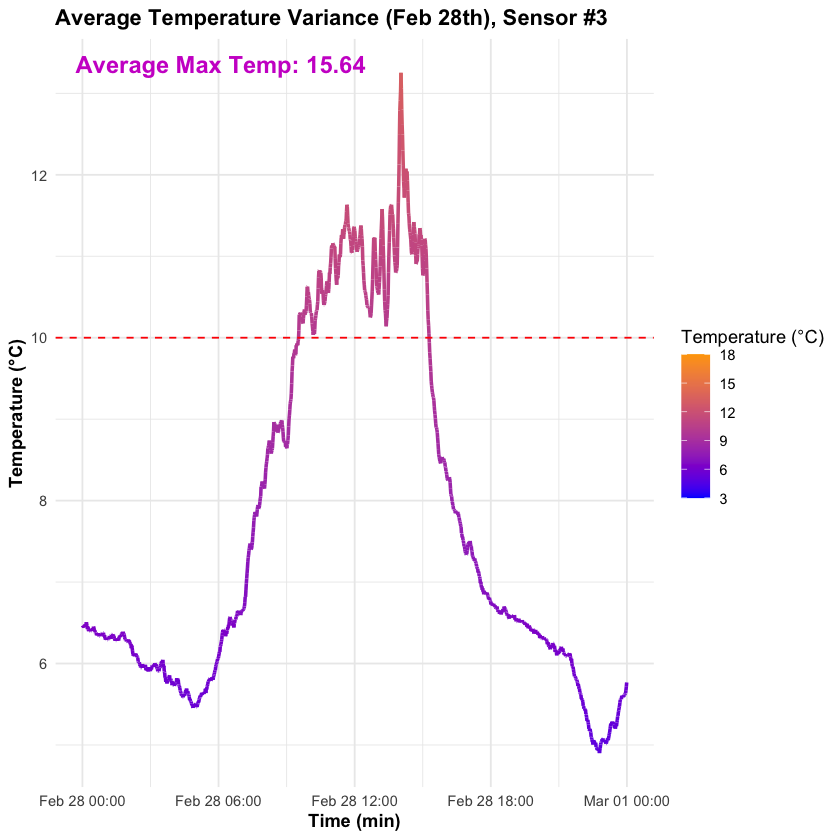

In [422]:
# Convert the specified temperature columns to numeric
specified_columns_S4 <- c("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")
day_28_data[, specified_columns_S4] <- lapply(day_28_data[, specified_columns_S4], as.numeric)

# Convert Date_Time_HST to POSIXct format
day_28_data$Date_Time_HST <- as.POSIXct(day_28_data$Date_Time_HST)

# Calculate the average of every row across specified columns for Sensor 4
day_28_data$row_averages_S4 <- rowMeans(day_28_data[, specified_columns_S4], na.rm = TRUE)

# Create a ggplot with average temperature values for Sensor 4
graph <- ggplot(day_28_data, aes(x = Date_Time_HST, y = row_averages_S4)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(aes(color = row_averages_S4), size = 1) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(3, 18)) +
  
  # Customize the plot labels and title
  labs(x = "Time (min)", y = "Temperature (°C)", title = paste("Average Temperature Variance (Feb 28th), Sensor #3")) +
  
annotate("text", x = max(day_28_data$Date_Time_HST), y = 11.8, hjust = 1.9
         , vjust = -7,
           label = paste("Average Max Temp:", round(average_highest_temp, 2)),
           color = "magenta3", size = 5, fontface = "bold") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold")
  )

print(graph)

In [423]:
temperature_columns <- c("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")

max_temperatures <- sapply(day_28_data[temperature_columns], function(column) max(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Highest temperature in", temperature_columns[i], ":", max_temperatures[i], "°C\n")
}

average_highest_temp <- mean(max_temperatures, na.rm = TRUE)

cat("Average of highest temperatures:", average_highest_temp, "°C\n")

Highest temperature in A4.Temperature...C.. : 14.2 °C
Highest temperature in B4.Temperature.....C.. : 13.12 °C
Highest temperature in C4.Temperature.....C.. : 10.38 °C
Highest temperature in D4.Temperature.....C.. : 13.25 °C
Average of highest temperatures: 12.7375 °C


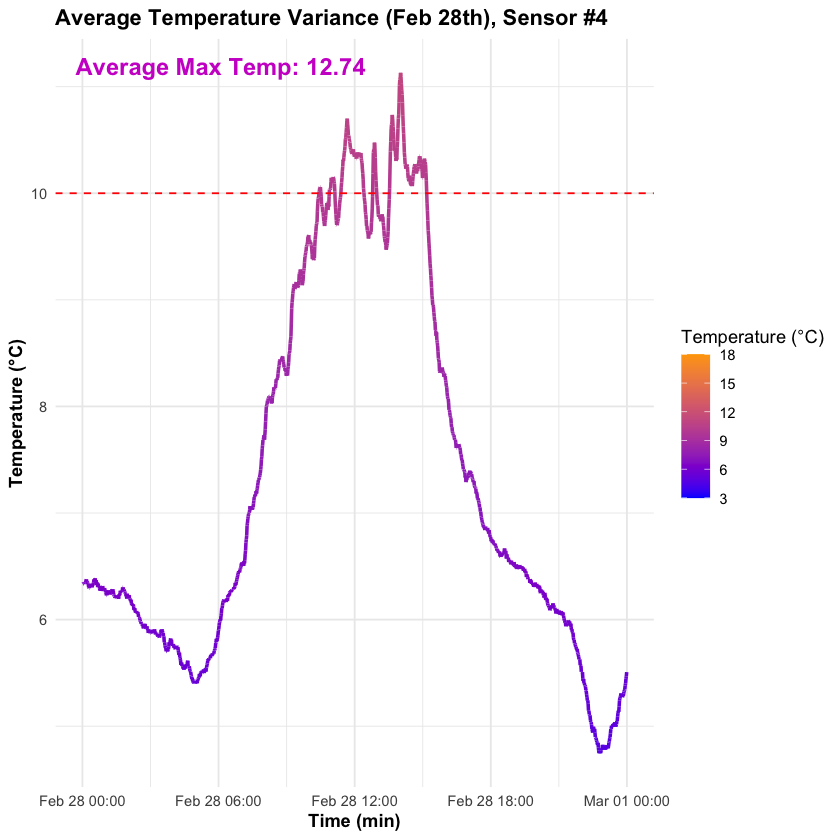

In [424]:
# Convert the specified temperature columns to numeric
specified_columns_S4 <- c("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")
day_28_data[, specified_columns_S4] <- lapply(day_28_data[, specified_columns_S4], as.numeric)

# Convert Date_Time_HST to POSIXct format
day_28_data$Date_Time_HST <- as.POSIXct(day_28_data$Date_Time_HST)

# Calculate the average of every row across specified columns for Sensor 4
day_28_data$row_averages_S4 <- rowMeans(day_28_data[, specified_columns_S4], na.rm = TRUE)

# Create a ggplot with average temperature values for Sensor 4
graph <- ggplot(day_28_data, aes(x = Date_Time_HST, y = row_averages_S4)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(aes(color = row_averages_S4), size = 1) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(3, 18)) +
  
  # Customize the plot labels and title
  labs(x = "Time (min)", y = "Temperature (°C)", title = paste("Average Temperature Variance (Feb 28th), Sensor #4")) +
  
    annotate("text", x = max(day_28_data$Date_Time_HST), y = 10.00, hjust = 1.9
         , vjust = -7,
           label = paste("Average Max Temp:", round(average_highest_temp, 2)),
           color = "magenta3", size = 5, fontface = "bold") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold")
  )
print(graph)

#### We performed an ANOVA and Tukey test to see if the max average temps were significantly different between the sensor positions. 
#### We found that there is a significant difference between the sensors, but only between sensor position #4 and position #3.

In [425]:
# Select relevant columns for each sensor
temperature_columns_control <- c('AC.Temperature.....C..', 'BC.Temperature.....C..', 'CC.Temperature.....C..', 'DC.Temperature.....C..')
temperature_columns_S1 <- c("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")
temperature_columns_S2 <- c("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")
temperature_columns_S3 <- c("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")
temperature_columns_S4 <- c("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")

# Find the highest temperature for each column
max_temperatures_control <- sapply(day_28_data[temperature_columns_control], function(column) max(as.numeric(column), na.rm = TRUE))
max_temperatures_S1 <- sapply(day_28_data[temperature_columns_S1], function(column) max(as.numeric(column), na.rm = TRUE))
max_temperatures_S2 <- sapply(day_28_data[temperature_columns_S2], function(column) max(as.numeric(column), na.rm = TRUE))
max_temperatures_S3 <- sapply(day_28_data[temperature_columns_S3], function(column) max(as.numeric(column), na.rm = TRUE))
max_temperatures_S4 <- sapply(day_28_data[temperature_columns_S4], function(column) max(as.numeric(column), na.rm = TRUE))

# Create a data frame for the ANOVA test
anova_data <- data.frame(
  Temperature = c(max_temperatures_control, max_temperatures_S1, max_temperatures_S2, max_temperatures_S3, max_temperatures_S4),
  Sensor_Location = rep(c("Control", "Sensor 1", "Sensor 2", "Sensor 3", "Sensor 4"), each = length(max_temperatures_control))
)

# Perform ANOVA test
anova_result <- aov(Temperature ~ Sensor_Location, data = anova_data)

# Print the ANOVA summary
summary(anova_result)

                Df Sum Sq Mean Sq F value Pr(>F)  
Sensor_Location  4  21.65   5.412   3.679  0.028 *
Residuals       15  22.07   1.471                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [426]:
library(dplyr)
library(tidyr)
library(stats)

# Select relevant columns for each sensor
temperature_columns_control <- c('AC.Temperature.....C..', 'BC.Temperature.....C..', 'CC.Temperature.....C..', 'DC.Temperature.....C..')
temperature_columns_S1 <- c("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")
temperature_columns_S2 <- c("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")
temperature_columns_S3 <- c("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")
temperature_columns_S4 <- c("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")

# Find the highest temperature for each column
max_temperatures_control <- sapply(day_28_data[temperature_columns_control], function(column) max(as.numeric(column), na.rm = TRUE))
max_temperatures_S1 <- sapply(day_28_data[temperature_columns_S1], function(column) max(as.numeric(column), na.rm = TRUE))
max_temperatures_S2 <- sapply(day_28_data[temperature_columns_S2], function(column) max(as.numeric(column), na.rm = TRUE))
max_temperatures_S3 <- sapply(day_28_data[temperature_columns_S3], function(column) max(as.numeric(column), na.rm = TRUE))
max_temperatures_S4 <- sapply(day_28_data[temperature_columns_S4], function(column) max(as.numeric(column), na.rm = TRUE))

# Create a data frame for the Tukey test
tukey_data <- data.frame(
  Temperature = c(max_temperatures_control, max_temperatures_S1, max_temperatures_S2, max_temperatures_S3, max_temperatures_S4),
  Sensor_Location = rep(c("Control", "Sensor 1", "Sensor 2", "Sensor 3", "Sensor 4"), each = length(max_temperatures_control))
)

# Perform ANOVA test
anova_result <- aov(Temperature ~ Sensor_Location, data = tukey_data)

# Perform Tukey post-hoc test
tukey_results <- TukeyHSD(anova_result)

# Print the Tukey results
print(tukey_results)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Temperature ~ Sensor_Location, data = tukey_data)

$Sensor_Location
                     diff     lwr         upr     p adj
Sensor 1-Control   0.1800 -2.4683  2.82829959 0.9995145
Sensor 2-Control   0.5675 -2.0808  3.21579959 0.9616557
Sensor 3-Control   0.7825 -1.8658  3.43079959 0.8877450
Sensor 4-Control  -2.1250 -4.7733  0.52329959 0.1482789
Sensor 2-Sensor 1  0.3875 -2.2608  3.03579959 0.9904964
Sensor 3-Sensor 1  0.6025 -2.0458  3.25079959 0.9527497
Sensor 4-Sensor 1 -2.3050 -4.9533  0.34329959 0.1033703
Sensor 3-Sensor 2  0.2150 -2.4333  2.86329959 0.9990227
Sensor 4-Sensor 2 -2.6925 -5.3408 -0.04420041 0.0454124
Sensor 4-Sensor 3 -2.9075 -5.5558 -0.25920041 0.0282610



#### We wanted to find the average minimum temperature for each sensor position across all four plots.
#### Process:
#### - Made a vector that contained all of the columns for each individual sensor in each plot
#### - Used the function “sapply” to convert the values in the previously made vector into numeric values and to find the min temp in each column
#### - Used a for loop to scan each temperature column for the lowest temperature
#### - Used “mean” function  to calculate the average of these minimum temperatures
#### - We then put the average minimum temperature found for each sensor into a bar chart using the values found above to define the data frame used by the ggplot2 “geom_bar” function to make the graph.



In [427]:
temperature_columns <- c("AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..")

min_temperatures <- sapply(day_28_data[temperature_columns], function(column) min(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Minimum temperature in", temperature_columns[i], ":", min_temperatures[i], "°C\n")
}

average_min_temp_Control_Sensor <- mean(min_temperatures, na.rm = TRUE)

cat("Average of minimum temperatures:", average_min_temp_Control_Sensor, "°C\n")


Minimum temperature in AC.Temperature.....C.. : 4.29 °C
Minimum temperature in BC.Temperature.....C.. : 4.84 °C
Minimum temperature in CC.Temperature.....C.. : 5.02 °C
Minimum temperature in DC.Temperature.....C.. : 3.82 °C
Average of minimum temperatures: 4.4925 °C


In [428]:
temperature_columns <- c("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")

min_temperatures <- sapply(day_28_data[temperature_columns], function(column) min(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Minimum temperature in", temperature_columns[i], ":", min_temperatures[i], "°C\n")
}

average_min_temp_Sensor_1 <- mean(min_temperatures, na.rm = TRUE)

cat("Average of minimum temperatures:", average_min_temp_Sensor_1, "°C\n")

Minimum temperature in A1.Temperature.....C.. : 3.94 °C
Minimum temperature in B1.Temperature.....C. : 4.42 °C
Minimum temperature in C1.Temperature.....C.. : 4.59 °C
Minimum temperature in D1.Temperature.....C.. : 4.46 °C
Average of minimum temperatures: 4.3525 °C


In [429]:
temperature_columns <- c("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")

min_temperatures <- sapply(day_28_data[temperature_columns], function(column) min(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Minimum temperature in", temperature_columns[i], ":", min_temperatures[i], "°C\n")
}

average_min_temp_Sensor_2 <- mean(min_temperatures, na.rm = TRUE)

cat("Average of minimum temperatures:", average_min_temp_Sensor_2, "°C\n")

Minimum temperature in A2.Temperature.....C.. : 4.16 °C
Minimum temperature in B2.Temperature.....C.. : 4.37 °C
Minimum temperature in C2.Temperature.....C.. : 4.63 °C
Minimum temperature in D2.Temperature.....C.. : 4.16 °C
Average of minimum temperatures: 4.33 °C


In [430]:
temperature_columns <- c("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")

min_temperatures <- sapply(day_28_data[temperature_columns], function(column) min(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Minimum temperature in", temperature_columns[i], ":", min_temperatures[i], "°C\n")
}

average_min_temp_Sensor_3 <- mean(min_temperatures, na.rm = TRUE)

cat("Average of minimum temperatures:", average_min_temp_Sensor_3, "°C\n")

Minimum temperature in A3.Temperature.....C.. : 4.12 °C
Minimum temperature in B3.Temperature.....C.. : 4.24 °C
Minimum temperature in C3.Temperature.....C.. : 4.33 °C
Minimum temperature in D3.Temperature.....C.. : 4.12 °C
Average of minimum temperatures: 4.2025 °C


In [431]:
temperature_columns <- c("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")

min_temperatures <- sapply(day_28_data[temperature_columns], function(column) min(as.numeric(column), na.rm = TRUE))

for (i in seq_along(temperature_columns)) {
  cat("Minimum temperature in", temperature_columns[i], ":", min_temperatures[i], "°C\n")
}

average_min_temp_Sensor_4 <- mean(min_temperatures, na.rm = TRUE)

cat("Average of minimum temperatures:", average_min_temp_Sensor_4, "°C\n")

Minimum temperature in A4.Temperature...C.. : 3.77 °C
Minimum temperature in B4.Temperature.....C.. : 4.24 °C
Minimum temperature in C4.Temperature.....C.. : 4.07 °C
Minimum temperature in D4.Temperature.....C.. : 4.29 °C
Average of minimum temperatures: 4.0925 °C


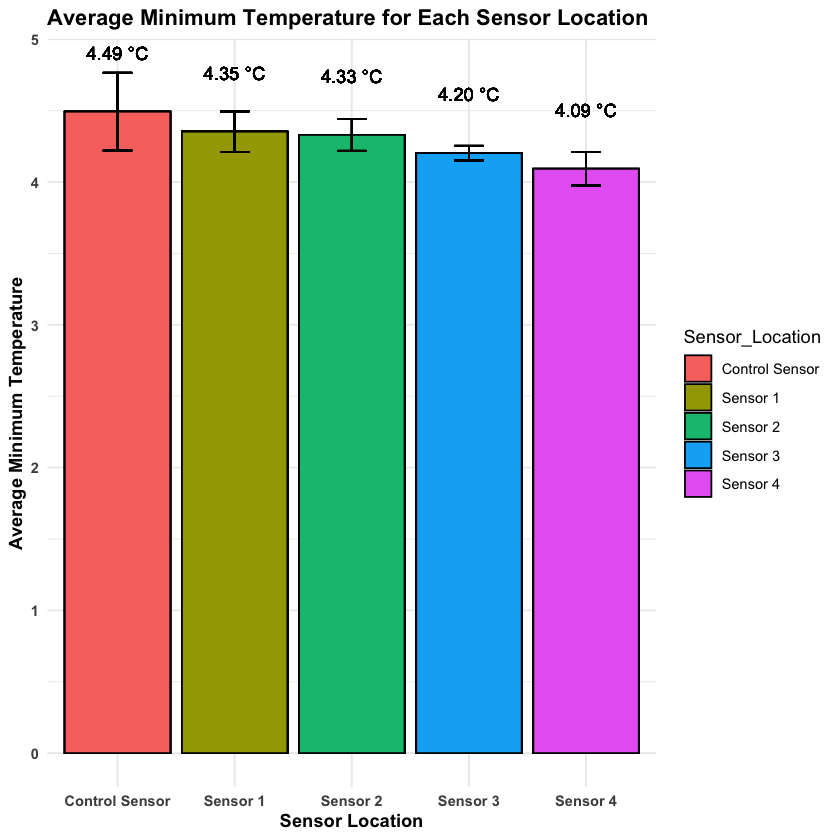

In [432]:
library(ggplot2)

# Select relevant columns
temperature_columns <- c(
  "AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..",
  "A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..",
  "A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..",
  "A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..",
  "A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C.."
)

# Find the minimum temperature for each column
min_temperatures <- sapply(day_28_data[temperature_columns], function(column) min(as.numeric(column), na.rm = TRUE))

# Calculate the average of the minimum temperatures
average_min_temps <- c(
  mean(min_temperatures[1:4], na.rm = TRUE),
  mean(min_temperatures[5:8], na.rm = TRUE),
  mean(min_temperatures[9:12], na.rm = TRUE),
  mean(min_temperatures[13:16], na.rm = TRUE),
  mean(min_temperatures[17:20], na.rm = TRUE)
)

# Calculate the standard error for each group of temperatures
se_min_temps <- c(
  sd(min_temperatures[1:4], na.rm = TRUE) / sqrt(length(min_temperatures[1:4])),
  sd(min_temperatures[5:8], na.rm = TRUE) / sqrt(length(min_temperatures[5:8])),
  sd(min_temperatures[9:12], na.rm = TRUE) / sqrt(length(min_temperatures[9:12])),
  sd(min_temperatures[13:16], na.rm = TRUE) / sqrt(length(min_temperatures[13:16])),
  sd(min_temperatures[17:20], na.rm = TRUE) / sqrt(length(min_temperatures[17:20]))
)

# Define data for the bar graph
sensor_data <- data.frame(
  Sensor_Location = rep(c("Control Sensor", "Sensor 1", "Sensor 2", "Sensor 3", "Sensor 4"), each = 4),
  Average_Min_Temperature = rep(average_min_temps, each = 4),
  Standard_Error = rep(se_min_temps, each = 4),
  Min_Temperature = rep(min_temperatures, each = 4)
)

# Create a bar graph with error bars and labels above the bars
bar_graph <- ggplot(sensor_data, aes(x = Sensor_Location, y = Average_Min_Temperature, fill = Sensor_Location)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  geom_errorbar(aes(ymin = Average_Min_Temperature - Standard_Error, ymax = Average_Min_Temperature + Standard_Error),
                position = position_dodge(width = 0.9), width = 0.25) +
  geom_text(aes(label = paste0(sprintf("%.2f", Average_Min_Temperature), " ", "\u00B0C")), position = position_dodge(width = 0.9), vjust = -4.0) +
  labs(x = "Sensor Location", y = "Average Minimum Temperature", title = "Average Minimum Temperature for Each Sensor Location") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(face = "bold"),
    axis.text.y = element_text(face = "bold"),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    plot.title = element_text(face = "bold")
  )

# Display the bar graph
print(bar_graph)

#### We perfomed an ANOVA and Tukey test to see if there was a significant difference between the average minimum temps of each sensor position.
#### The null hypothesis was rejected as the ANOVA test found a significant difference between the min mean temp of the sensor positions.
#### The Tukey test found that this difference lies in sensor position #3 as it was significantly different from the control sensor position as well as position #2.

In [433]:
# Select relevant columns
temperature_columns <- c(
  "AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..",
  "A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..",
  "A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..",
  "A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..",
  "A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C.."
)

# Find the minimum temperature for each column
min_temperatures <- sapply(day_28_data[temperature_columns], function(column) min(as.numeric(column), na.rm = TRUE))

# Create a data frame for the ANOVA
anova_data <- data.frame(
  Sensor_Location = rep(c("Control", "Sensor_1", "Sensor_2", "Sensor_3", "Sensor_4"), each = 4),
  Min_Temperature = rep(min_temperatures, each = 4)
)

# Perform ANOVA
anova_result <- aov(Min_Temperature ~ Sensor_Location, data = anova_data)

# Print ANOVA summary
summary(anova_result)

# Perform Tukey post hoc test
tukey_result <- TukeyHSD(anova_result)

# Print Tukey post hoc test summary
print(tukey_result)

                Df Sum Sq Mean Sq F value  Pr(>F)   
Sensor_Location  4  1.401  0.3502   4.369 0.00314 **
Residuals       75  6.012  0.0802                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Min_Temperature ~ Sensor_Location, data = anova_data)

$Sensor_Location
                     diff       lwr         upr     p adj
Sensor_1-Control  -0.0250 -0.304809  0.25480905 0.9991223
Sensor_2-Control   0.0950 -0.184809  0.37480905 0.8766184
Sensor_3-Control  -0.2925 -0.572309 -0.01269095 0.0360084
Sensor_4-Control  -0.1325 -0.412309  0.14730905 0.6774681
Sensor_2-Sensor_1  0.1200 -0.159809  0.39980905 0.7520518
Sensor_3-Sensor_1 -0.2675 -0.547309  0.01230905 0.0678183
Sensor_4-Sensor_1 -0.1075 -0.387309  0.17230905 0.8192961
Sensor_3-Sensor_2 -0.3875 -0.667309 -0.10769095 0.0020841
Sensor_4-Sensor_2 -0.2275 -0.507309  0.05230905 0.1653135
Sensor_4-Sensor_3  0.1600 -0.119809  0.43980905 0.5031281



#### We wanted to see every time the temperature went below 10 degrees for thirty minutes or more within the 24 hours of February 28h. 
#### Process:
#### - Created a vector to store the data in the specified columns for each sensor position.
#### - Used “rowMeans” function to find the mean of the specified columns.
#### - Used the comparison operator “< 10” to check to see of the averages calculated above were less than 10 degrees, giving  result of TRUE or FALSE.
#### - Used “consecutive count” variable to set up a counter consecutive occurrences in the next steps.
#### - Created an empty data frame to later populate it with data points that meet the conditions of the proceeding for loop.
#### - Created a for loop to keep track of every time the temp went below 10 degrees for 30 min or more, and records the starting time and the corresponding average temp.
#### - Used ggplot to create a graph to show the information.


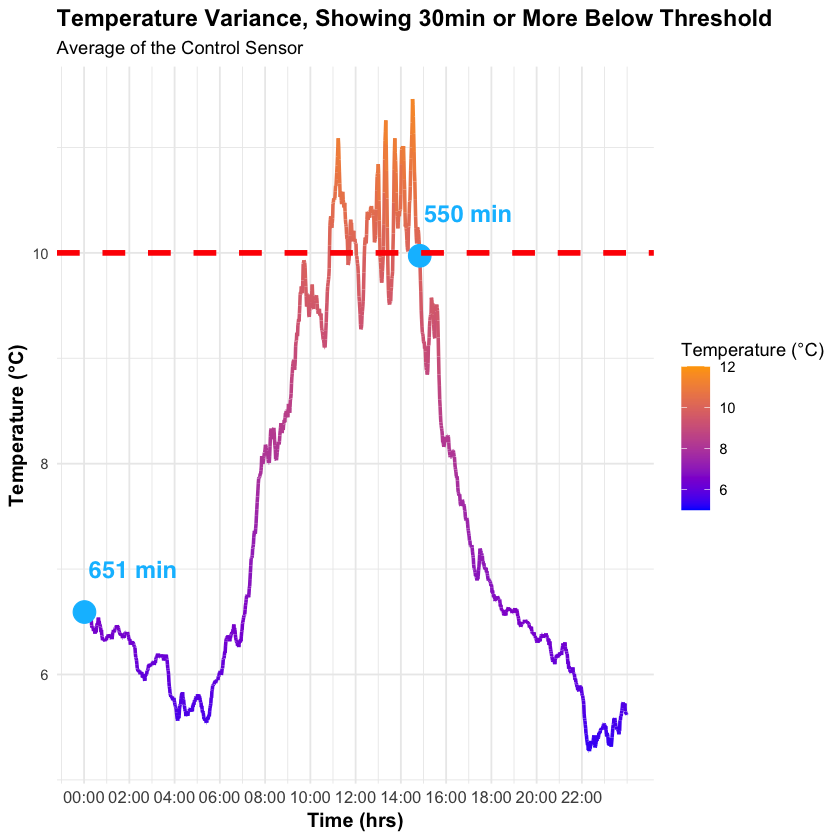

In [434]:
# Columns for control sensors
specified_columns <- c("AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C..")

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y), color = "#00BFFF", size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
  geom_text(data = subset(highlight_data, Streak_Length >= 30),
            aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
            vjust = -2, hjust = -0.05, size = 5, color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans", position = position_nudge(x = 0.2)) +
  
  # Add a horizontal line at the threshold in red
   geom_hline(yintercept = 10, linetype = "dashed", color = "red", size = 1.6) +
  
  # Customize the color scale for values above 10 degrees
 scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(5, 12)) +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, Showing 30min or More Below Threshold",
       subtitle = "Average of the Control Sensor") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the entire day
  scale_x_datetime(limits = c(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST)),
                   breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "2 hours"),
                   labels = scales::date_format("%H:%M"))

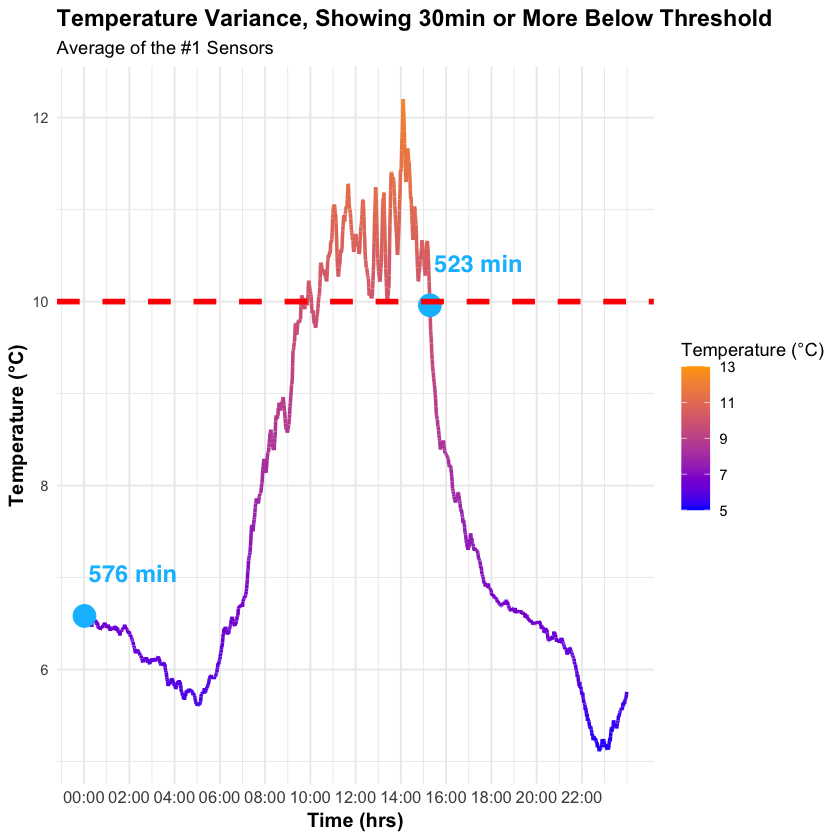

In [435]:
# Columns for control sensors
specified_columns <- c("A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C..")

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y), color = "#00BFFF", size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
  geom_text(data = subset(highlight_data, Streak_Length >= 30),
            aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
            vjust = -2, hjust = -0.05, size = 5, color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans", position = position_nudge(x = 0.2)) +
  
  # Add a horizontal line at the threshold in red
   geom_hline(yintercept = 10, linetype = "dashed", color = "red", size = 1.6) +
  
  # Customize the color scale for values above 10 degrees
 scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(5, 13)) +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, Showing 30min or More Below Threshold",
       subtitle = "Average of the #1 Sensors") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the entire day
  scale_x_datetime(limits = c(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST)),
                   breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "2 hours"),
                   labels = scales::date_format("%H:%M"))

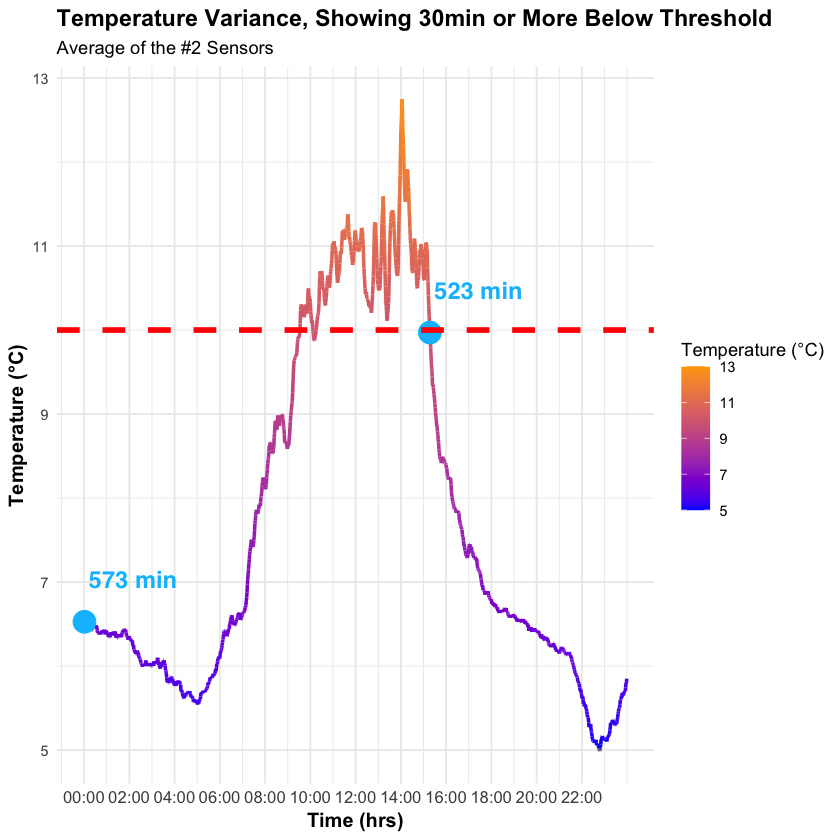

In [436]:
# Columns for control sensors
specified_columns <- c("A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C..")

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y), color = "#00BFFF", size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
  geom_text(data = subset(highlight_data, Streak_Length >= 30),
            aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
            vjust = -2, hjust = -0.05, size = 5, color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans", position = position_nudge(x = 0.2)) +
  
  # Add a horizontal line at the threshold in red
   geom_hline(yintercept = 10, linetype = "dashed", color = "red", size = 1.6) +
  
  # Customize the color scale for values above 10 degrees
 scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(5, 13)) +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, Showing 30min or More Below Threshold",
       subtitle = "Average of the #2 Sensors") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the entire day
  scale_x_datetime(limits = c(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST)),
                   breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "2 hours"),
                   labels = scales::date_format("%H:%M"))

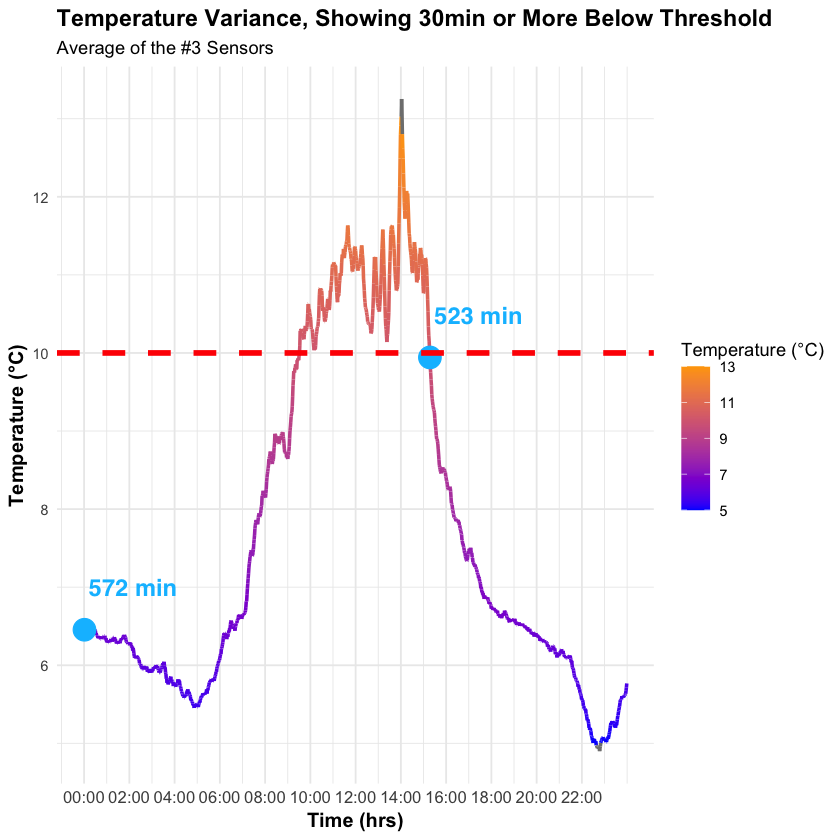

In [437]:
# Columns for control sensors
specified_columns <- c("A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C..")

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y), color = "#00BFFF", size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
  geom_text(data = subset(highlight_data, Streak_Length >= 30),
            aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
            vjust = -2, hjust = -0.05, size = 5, color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans", position = position_nudge(x = 0.2)) +
  
  # Add a horizontal line at the threshold in red
   geom_hline(yintercept = 10, linetype = "dashed", color = "red", size = 1.6) +
  
  # Customize the color scale for values above 10 degrees
 scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(5, 13)) +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, Showing 30min or More Below Threshold",
       subtitle = "Average of the #3 Sensors") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the entire day
  scale_x_datetime(limits = c(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST)),
                   breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "2 hours"),
                   labels = scales::date_format("%H:%M"))

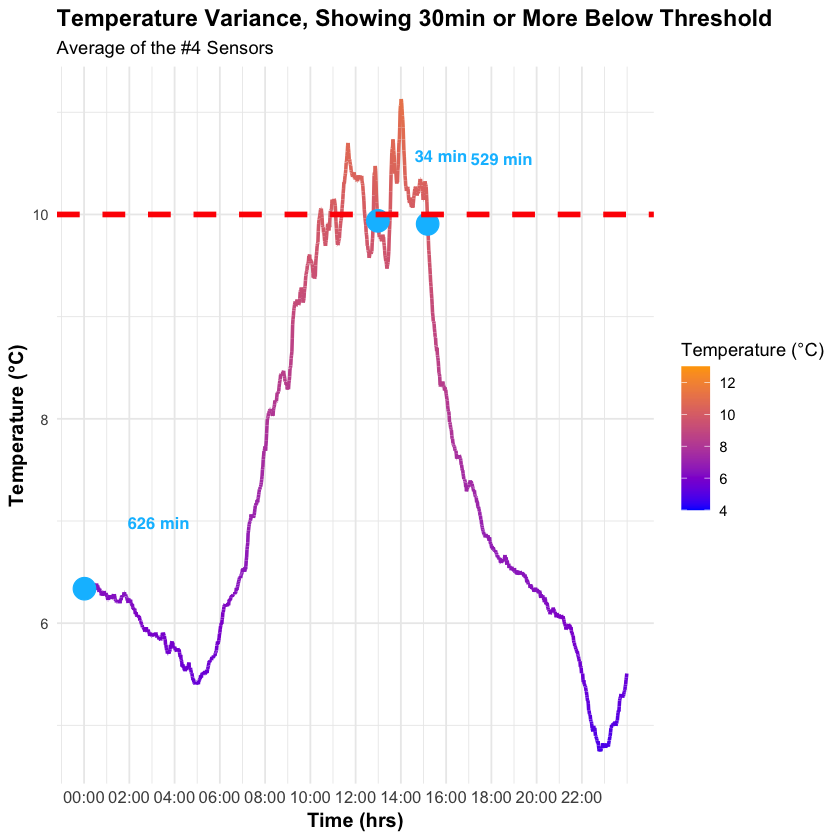

In [438]:
# Columns for control sensors
specified_columns <- c("A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C..")

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y), color = "#00BFFF", size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
  geom_text(data = subset(highlight_data, Streak_Length >= 30),
            aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
            vjust = -5, hjust = -0.7
            , size = 3.5
            , color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans", position = position_nudge(x = 1.5
                                                                                                                )) +
  
  # Add a horizontal line at the threshold in red
   geom_hline(yintercept = 10, linetype = "dashed", color = "red", size = 1.6) +
  
  # Customize the color scale for values above 10 degrees
 scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)", limits = c(4, 13)) +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, Showing 30min or More Below Threshold",
       subtitle = "Average of the #4 Sensors") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the entire day
  scale_x_datetime(limits = c(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST)),
                   breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "2 hours"),
                   labels = scales::date_format("%H:%M"))

## Please note that the code for the above graphs with the 9AM-3PM data extracted had to be submitted separately due to the code changing the scale of the x-axis of every previous graph when included in this Jupyter Notebook document. The document is entitled, "9AM-3PM Graphs".

## Please also note that the code for the Logistic Regression graph also had to be included in a separate document due to the code having packages that Jupyter Notebook did not support. The document is entitled, "OCN-682-New-Script-Description". 